In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller


In [71]:
features_1 = pd.read_csv('../data/processed/m_features.csv')
features_2 = pd.read_csv('../data/processed/m_potato_features.csv')

In [72]:
features_1.head()

,date,CPI,Exchange Rate,GDP Deflator,GDP Growth,Cereal Yield,Fertilizer Consumption,Rural Population,Employment in Agriculture,Access to Electricity,Inflation Rate,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration,holidays
0,2013-06-01,134.911559,94.947081,119.234817,4.561124,2696.775,59.830635,82.032083,65.766698,80.525,8.758493,24.273333,19.173333,21.316667,550.0,6.596667,420.21,84.03,1
1,2013-07-01,135.820242,95.319618,120.007364,4.768318,2700.350,60.907737,82.001500,65.717010,81.150,8.702159,23.783871,19.487097,21.135484,620.7,6.287097,375.16,74.59,1
2,2013-08-01,136.728925,95.692155,120.779912,4.975512,2703.925,61.984838,81.970917,65.667323,81.775,8.645825,23.929032,18.893548,20.906452,415.8,6.041935,431.83,84.34,3
3,2013-09-01,137.637608,96.064693,121.552459,5.182706,2707.500,63.061940,81.940333,65.617635,82.400,8.589491,24.000000,18.020000,20.580000,217.9,6.186667,480.53,91.87,5
4,2013-10-01,138.546290,96.437230,122.325006,5.389900,2711.075,64.139041,81.909750,65.567948,83.025,8.533157,21.064516,15.274194,17.848387,238.2,5.403226,398.57,73.18,6


In [73]:
features_2.head()

,date,Export Quantity,Import Quantity,Area harvested,Production,Yield
0,2013-06-01,1298.225,179180.425,200771.916667,2.743376e+06,13663.591667
1,2013-07-01,1474.070,180215.310,201479.500000,2.753966e+06,13668.150000
2,2013-08-01,1649.915,181250.195,202187.083333,2.764557e+06,13672.708333
3,2013-09-01,1825.760,182285.080,202894.666667,2.775148e+06,13677.266667
4,2013-10-01,2001.605,183319.965,203602.250000,2.785739e+06,13681.825000


In [74]:
features_1['date'] = pd.to_datetime(features_1['date'])
features_1.set_index('date', inplace=True)

features_2['date'] = pd.to_datetime(features_2['date'])
features_2.set_index('date', inplace=True)


features = features_1.join(features_2, how='inner')
features.drop(columns=['holidays'], inplace=True) # holidays column doesn't need to be predicted
features.head()

,CPI,Exchange Rate,GDP Deflator,GDP Growth,Cereal Yield,Fertilizer Consumption,Rural Population,Employment in Agriculture,Access to Electricity,Inflation Rate,...,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration,Export Quantity,Import Quantity,Area harvested,Production,Yield
date,,,,,,,,,,,,,,,,,,,,,
2013-06-01,134.911559,94.947081,119.234817,4.561124,2696.775,59.830635,82.032083,65.766698,80.525,8.758493,...,21.316667,550.0,6.596667,420.21,84.03,1298.225,179180.425,200771.916667,2.743376e+06,13663.591667
2013-07-01,135.820242,95.319618,120.007364,4.768318,2700.350,60.907737,82.001500,65.717010,81.150,8.702159,...,21.135484,620.7,6.287097,375.16,74.59,1474.070,180215.310,201479.500000,2.753966e+06,13668.150000
2013-08-01,136.728925,95.692155,120.779912,4.975512,2703.925,61.984838,81.970917,65.667323,81.775,8.645825,...,20.906452,415.8,6.041935,431.83,84.34,1649.915,181250.195,202187.083333,2.764557e+06,13672.708333
2013-09-01,137.637608,96.064693,121.552459,5.182706,2707.500,63.061940,81.940333,65.617635,82.400,8.589491,...,20.580000,217.9,6.186667,480.53,91.87,1825.760,182285.080,202894.666667,2.775148e+06,13677.266667
2013-10-01,138.546290,96.437230,122.325006,5.389900,2711.075,64.139041,81.909750,65.567948,83.025,8.533157,...,17.848387,238.2,5.403226,398.57,73.18,2001.605,183319.965,203602.250000,2.785739e+06,13681.825000


In [75]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2013-06-01 to 2021-05-01
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CPI                         96 non-null     float64
 1   Exchange Rate               96 non-null     float64
 2   GDP Deflator                96 non-null     float64
 3   GDP Growth                  96 non-null     float64
 4   Cereal Yield                96 non-null     float64
 5   Fertilizer Consumption      96 non-null     float64
 6   Rural Population            96 non-null     float64
 7   Employment in Agriculture   96 non-null     float64
 8   Access to Electricity       96 non-null     float64
 9   Inflation Rate              96 non-null     float64
 10  temperature_2m_max          96 non-null     float64
 11  temperature_2m_min          96 non-null     float64
 12  temperature_2m_mean         96 non-null     float64
 13  precipitation_sum

In [76]:
def check_stationarity(series):
    """
    Check stationarity of a series and apply differencing until it becomes stationary.
    """
    # Ensure no infinite recursion
    max_diff = 5  # Set a limit to the number of differencing steps
    diff_count = 0
    
    while diff_count < max_diff:
        result = adfuller(series.dropna())  # Drop NaNs for ADF test
        if result[1] <= 0.05:
            print(f"The series is stationary after {diff_count} differencing step(s).")
            print('\n')
            return series, diff_count
        else:
            print(f"The series is non-stationary. Applying differencing (step {diff_count + 1})...")
            series = series.diff()
            diff_count += 1
    
    raise ValueError("The series could not be made stationary within the differencing limit.")

# Initialize a dictionary to store the differencing degrees
differencing_degrees = {}
diff_features = features.copy()

# Apply the function to each column of the DataFrame
for col in diff_features.columns:
    print(f"Checking for stationarity for {col}...")
    stationary_series, diff_count = check_stationarity(diff_features[col])

    differencing_degrees[col] = diff_count  # Store the differencing degree
    diff_features[col] = stationary_series  # Store the stationary series
    
    #features = features.drop(columns=[col])

Checking for stationarity for CPI...
The series is non-stationary. Applying differencing (step 1)...
The series is non-stationary. Applying differencing (step 2)...
The series is stationary after 2 differencing step(s).


Checking for stationarity for Exchange Rate...
The series is non-stationary. Applying differencing (step 1)...
The series is non-stationary. Applying differencing (step 2)...
The series is stationary after 2 differencing step(s).


Checking for stationarity for GDP Deflator...
The series is non-stationary. Applying differencing (step 1)...
The series is non-stationary. Applying differencing (step 2)...
The series is stationary after 2 differencing step(s).


Checking for stationarity for GDP Growth...
The series is stationary after 0 differencing step(s).


Checking for stationarity for Cereal Yield...
The series is non-stationary. Applying differencing (step 1)...
The series is non-stationary. Applying differencing (step 2)...
The series is stationary after 2 differe

In [77]:
diff_features = diff_features[3:]
diff_features

,CPI,Exchange Rate,GDP Deflator,GDP Growth,Cereal Yield,Fertilizer Consumption,Rural Population,Employment in Agriculture,Access to Electricity,Inflation Rate,...,temperature_2m_mean,precipitation_sum,wind_speed_10m_max,shortwave_radiation_sum,et0_fao_evapotranspiration,Export Quantity,Import Quantity,Area harvested,Production,Yield
date,,,,,,,,,,,,,,,,,,,,,
2013-09-01,0.000000e+00,4.263256e-14,1.421085e-14,5.182706,0.000000e+00,0.000000e+00,-2.842171e-14,0.000000e+00,82.400000,0.000000e+00,...,-0.326452,-197.9,0.144731,48.70,91.87,1825.760000,-2.910383e-11,202894.666667,0.000000e+00,1.818989e-12
2013-10-01,-5.684342e-14,-4.263256e-14,0.000000e+00,5.389900,4.547474e-13,0.000000e+00,2.842171e-14,0.000000e+00,83.025000,0.000000e+00,...,-2.731613,20.3,-0.783441,-81.96,73.18,2001.605000,2.910383e-11,203602.250000,4.656613e-10,0.000000e+00
2013-11-01,5.684342e-14,0.000000e+00,1.421085e-14,5.597095,-4.547474e-13,-7.105427e-15,-2.842171e-14,0.000000e+00,83.650000,0.000000e+00,...,-3.738387,-233.9,0.883441,36.71,72.67,2177.450000,0.000000e+00,204309.833333,-4.656613e-10,-3.637979e-12
2013-12-01,0.000000e+00,4.263256e-14,-1.421085e-14,5.804289,4.547474e-13,1.421085e-14,2.842171e-14,0.000000e+00,84.275000,0.000000e+00,...,-2.993871,0.8,0.132688,-38.83,61.33,2353.295000,-2.910383e-11,205017.416667,0.000000e+00,3.637979e-12
2014-01-01,-2.842171e-14,-2.842171e-14,-1.421085e-14,6.011483,-4.547474e-13,-1.421085e-14,-2.842171e-14,0.000000e+00,84.900000,0.000000e+00,...,-0.432258,11.1,0.312903,36.54,67.15,2529.140000,2.910383e-11,205725.000000,4.656613e-10,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01,-2.842171e-14,2.842171e-14,0.000000e+00,4.838150,0.000000e+00,-1.421085e-14,0.000000e+00,-2.131628e-14,89.900000,-8.881784e-16,...,0.096774,-2.3,1.212903,33.94,74.54,0.850000,-5.820766e-11,198788.000000,0.000000e+00,-3.637979e-12
2021-02-01,6.309124e-01,6.063735e-01,2.888067e-01,4.904247,2.461667e+01,3.449102e-01,-9.166667e-04,-2.332498e-02,90.016667,3.669832e-01,...,1.190553,22.4,0.142742,26.56,81.69,3.093333,-7.069676e+03,198743.416667,-8.983583e+03,3.328333e+01
2021-03-01,5.684342e-14,1.421085e-14,-2.842171e-14,4.970344,0.000000e+00,0.000000e+00,9.166667e-04,7.105427e-15,90.133333,8.881784e-16,...,4.238479,13.9,0.412097,144.44,119.26,5.336667,5.820766e-11,198698.833333,0.000000e+00,-3.637979e-12


In [78]:
# split train test data. 12 months for test data
train_data = diff_features[:-12]
test_data = features[-12:]

In [79]:
train_data = train_data.asfreq('MS')

In [80]:
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    """
    Optimize ARIMA parameters for a given time series.
    """
    results = []
    
    for order in tqdm(order_list):

        print(f"Order[0]: {order[0]}, d: {d} , Order[1]: {order[1]}")
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False, trend='ct').fit(disp=False)
        except Exception as e:
            print(f"Error with order {order}: {e}")
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    # Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

def optimize_ARIMA_for_df(df: pd.DataFrame, order_list: list, differencing_degrees: dict) -> dict:
    """
    Optimize ARIMA for each column in the DataFrame using the specified differencing degree for each column.
    """
    results_dict = {}

    for column in tqdm(df.columns, desc="Optimizing ARIMA for each column"):
        print('Column:', column)    
        d = differencing_degrees.get(column, 0)  # Get differencing degree for the column, default to 0 if not found
        if d is None:
            print(f"Skipping column {column} due to missing differencing degree.")
            results_dict[column] = None
            continue
        
        try:
            endog = df[column].dropna()  # Ensure no NaN values in the column
            result_df = optimize_ARIMA(endog, order_list, d)
            results_dict[column] = result_df
        except Exception as e:
            print(f"Error processing column {column}: {e}")
            results_dict[column] = None  # Store None if the column cannot be processed

    return results_dict


# Example Usage: 

# Assuming `train_data` is your DataFrame and `differencing_degrees` is your dictionary of differencing degrees.
# Define the list of ARIMA orders to try.
order_list = [(p, q) for p in range(5) for q in range(5)]  # Example: (0, 0) to (2, 2)

# Apply the function
df_results = optimize_ARIMA_for_df(train_data, order_list, differencing_degrees)

Optimizing ARIMA for each column:   0%|          | 0/22 [00:00<?, ?it/s]

Column: CPI


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 2
Order[0]: 0, d: 2 , Order[1]: 3
Order[0]: 0, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 2
Order[0]: 1, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 4
Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1
Order[0]: 2, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1
Order[0]: 3, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 4
Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1
Order[0]: 4, d: 2 , Order[1]: 2
Order[0]: 4, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Column: Exchange Rate


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 3
Order[0]: 0, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1
Order[0]: 1, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1
Order[0]: 2, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 3
Order[0]: 2, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1
Order[0]: 3, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 3
Order[0]: 3, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1
Order[0]: 4, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 4
Column: GDP Deflator


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 2 , Order[1]: 2
Order[0]: 0, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 4
Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1
Order[0]: 1, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 3
Order[0]: 1, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1
Order[0]: 2, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 4
Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1
Order[0]: 3, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 4
Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1
Order[0]: 4, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 3
Order[0]: 4, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Column: GDP Growth


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 0, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 1, d: 0 , Order[1]: 3
Order[0]: 1, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 2, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 2, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 0 , Order[1]: 0
Order[0]: 3, d: 0 , Order[1]: 1
Order[0]: 3, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 0 , Order[1]: 4
Order[0]: 4, d: 0 , Order[1]: 0


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 0 , Order[1]: 1
Order[0]: 4, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 0 , Order[1]: 3
Order[0]: 4, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Column: Cereal Yield


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 2
Order[0]: 0, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1
Order[0]: 1, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 4
Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1
Order[0]: 4, d: 2 , Order[1]: 2
Order[0]: 4, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 4
Column: Fertilizer Consumption


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1
Order[0]: 0, d: 2 , Order[1]: 2
Order[0]: 0, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 2
Order[0]: 1, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 4
Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1
Order[0]: 3, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1
Order[0]: 4, d: 2 , Order[1]: 2
Order[0]: 4, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 4
Column: Rural Population


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 3 , Order[1]: 0
Order[0]: 0, d: 3 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 3 , Order[1]: 2
Order[0]: 0, d: 3 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 3 , Order[1]: 4
Order[0]: 1, d: 3 , Order[1]: 0
Order[0]: 1, d: 3 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\U

Order[0]: 1, d: 3 , Order[1]: 2
Order[0]: 1, d: 3 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 3 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 3 , Order[1]: 0


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 3 , Order[1]: 1
Order[0]: 2, d: 3 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 3 , Order[1]: 3
Order[0]: 2, d: 3 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 3 , Order[1]: 0
Order[0]: 3, d: 3 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 3 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 3 , Order[1]: 3
Order[0]: 3, d: 3 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 3 , Order[1]: 0


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 3 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 3 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 3 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 3 , Order[1]: 4
Column: Employment in Agriculture


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1
Order[0]: 0, d: 2 , Order[1]: 2
Order[0]: 0, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 4
Order[0]: 1, d: 2 , Order[1]: 0


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 1
Order[0]: 1, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 3
Order[0]: 1, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 0


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 2
Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 0


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 4
Order[0]: 4, d: 2 , Order[1]: 0


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 4
Column: Access to Electricity


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 1, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 4
Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 4
Order[0]: 3, d: 0 , Order[1]: 0
Order[0]: 3, d: 0 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 0 , Order[1]: 2
Order[0]: 3, d: 0 , Order[1]: 3
Order[0]: 3, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 0 , Order[1]: 0
Order[0]: 4, d: 0 , Order[1]: 1
Order[0]: 4, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 0 , Order[1]: 4
Column: Inflation Rate


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1
Order[0]: 0, d: 2 , Order[1]: 2
Order[0]: 0, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 4
Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1
Order[0]: 1, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 4
Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1
Order[0]: 2, d: 2 , Order[1]: 2
Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 3
Order[0]: 3, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1
Order[0]: 4, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 3
Order[0]: 4, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Column: temperature_2m_max


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 1 , Order[1]: 0
Order[0]: 0, d: 1 , Order[1]: 1
Order[0]: 0, d: 1 , Order[1]: 2
Order[0]: 0, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 1 , Order[1]: 0
Order[0]: 1, d: 1 , Order[1]: 1
Order[0]: 1, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 1 , Order[1]: 3
Order[0]: 1, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\

Order[0]: 2, d: 1 , Order[1]: 0
Order[0]: 2, d: 1 , Order[1]: 1
Order[0]: 2, d: 1 , Order[1]: 2
Order[0]: 2, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 0
Order[0]: 3, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 2
Order[0]: 3, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 0
Order[0]: 4, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 4
Column: temperature_2m_min


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 1 , Order[1]: 0
Order[0]: 0, d: 1 , Order[1]: 1
Order[0]: 0, d: 1 , Order[1]: 2
Order[0]: 0, d: 1 , Order[1]: 3
Order[0]: 0, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 1 , Order[1]: 0
Order[0]: 1, d: 1 , Order[1]: 1
Order[0]: 1, d: 1 , Order[1]: 2
Order[0]: 1, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 1 , Order[1]: 0
Order[0]: 2, d: 1 , Order[1]: 1
Order[0]: 2, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 0
Order[0]: 3, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 0
Order[0]: 4, d: 1 , Order[1]: 1
Order[0]: 4, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

Order[0]: 4, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 4
Column: temperature_2m_mean


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 1 , Order[1]: 0
Order[0]: 0, d: 1 , Order[1]: 1
Order[0]: 0, d: 1 , Order[1]: 2
Order[0]: 0, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 1 , Order[1]: 0
Order[0]: 1, d: 1 , Order[1]: 1
Order[0]: 1, d: 1 , Order[1]: 2
Order[0]: 1, d: 1 , Order[1]: 3
Order[0]: 1, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 1 , Order[1]: 0
Order[0]: 2, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 1 , Order[1]: 2
Order[0]: 2, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 0
Order[0]: 3, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 0
Order[0]: 4, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 4
Column: precipitation_sum


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 1 , Order[1]: 0
Order[0]: 0, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 1 , Order[1]: 2
Order[0]: 0, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 1 , Order[1]: 0
Order[0]: 1, d: 1 , Order[1]: 1
Order[0]: 1, d: 1 , Order[1]: 2
Order[0]: 1, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

Order[0]: 2, d: 1 , Order[1]: 0
Order[0]: 2, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 1 , Order[1]: 2
Order[0]: 2, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 1 , Order[1]: 4
Order[0]: 3, d: 1 , Order[1]: 0
Order[0]: 3, d: 1 , Order[1]: 1
Order[0]: 3, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 0
Order[0]: 4, d: 1 , Order[1]: 1
Order[0]: 4, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 4
Column: wind_speed_10m_max


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 1 , Order[1]: 0
Order[0]: 0, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 1 , Order[1]: 3
Order[0]: 0, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 1 , Order[1]: 0
Order[0]: 1, d: 1 , Order[1]: 1
Order[0]: 1, d: 1 , Order[1]: 2
Order[0]: 1, d: 1 , Order[1]: 3
Order[0]: 1, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 1 , Order[1]: 0
Order[0]: 2, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 1 , Order[1]: 2
Order[0]: 2, d: 1 , Order[1]: 3
Order[0]: 2, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 0
Order[0]: 3, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 2
Order[0]: 3, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 0
Order[0]: 4, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 1 , Order[1]: 4
Column: shortwave_radiation_sum


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 1 , Order[1]: 0
Order[0]: 0, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 1 , Order[1]: 2
Order[0]: 0, d: 1 , Order[1]: 3
Order[0]: 0, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 1 , Order[1]: 0
Order[0]: 1, d: 1 , Order[1]: 1
Order[0]: 1, d: 1 , Order[1]: 2
Order[0]: 1, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 1 , Order[1]: 0
Order[0]: 2, d: 1 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 1 , Order[1]: 2
Order[0]: 2, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 0
Order[0]: 3, d: 1 , Order[1]: 1
Order[0]: 3, d: 1 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 0
Order[0]: 4, d: 1 , Order[1]: 1
Order[0]: 4, d: 1 , Order[1]: 2
Order[0]: 4, d: 1 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 1 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Column: et0_fao_evapotranspiration


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2
Order[0]: 0, d: 0 , Order[1]: 3
Order[0]: 0, d: 0 , Order[1]: 4
Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 3
Order[0]: 1, d: 0 , Order[1]: 4
Order[0]: 2, d: 0 , Order[1]: 0


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 0 , Order[1]: 0
Order[0]: 3, d: 0 , Order[1]: 1
Order[0]: 3, d: 0 , Order[1]: 2
Order[0]: 3, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 0 , Order[1]: 0
Order[0]: 4, d: 0 , Order[1]: 1
Order[0]: 4, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

Order[0]: 4, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 0 , Order[1]: 4
Column: Export Quantity


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1
Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 0 , Order[1]: 0
Order[0]: 3, d: 0 , Order[1]: 1
Order[0]: 3, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

Order[0]: 3, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 0 , Order[1]: 0
Order[0]: 4, d: 0 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 0 , Order[1]: 4
Column: Import Quantity


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1
Order[0]: 0, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1
Order[0]: 1, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 2, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 2
Order[0]: 3, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 4
Column: Area harvested


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

Order[0]: 0, d: 0 , Order[1]: 0
Order[0]: 0, d: 0 , Order[1]: 1
Order[0]: 0, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 0 , Order[1]: 3
Order[0]: 0, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 0
Order[0]: 1, d: 0 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 2
Order[0]: 1, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 0 , Order[1]: 0
Order[0]: 2, d: 0 , Order[1]: 1
Order[0]: 2, d: 0 , Order[1]: 2
Order[0]: 2, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 2, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 0 , Order[1]: 0
Order[0]: 3, d: 0 , Order[1]: 1
Order[0]: 3, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 0 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 0 , Order[1]: 0
Order[0]: 4, d: 0 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 0 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 0 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 0 , Order[1]: 4
Column: Production


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1
Order[0]: 0, d: 2 , Order[1]: 2
Order[0]: 0, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1
Order[0]: 1, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1
Order[0]: 2, d: 2 , Order[1]: 2
Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 2, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1
Order[0]: 3, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 3, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1
Order[0]: 4, d: 2 , Order[1]: 2
Order[0]: 4, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 4
Column: Yield


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


  0%|          | 0/25 [00:00<?, ?it/s]

c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 0
Order[0]: 0, d: 2 , Order[1]: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 0, d: 2 , Order[1]: 2
Order[0]: 0, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 0, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 1, d: 2 , Order[1]: 0
Order[0]: 1, d: 2 , Order[1]: 1
Order[0]: 1, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 1, d: 2 , Order[1]: 4
Order[0]: 2, d: 2 , Order[1]: 0
Order[0]: 2, d: 2 , Order[1]: 1
Order[0]: 2, d: 2 , Order[1]: 2
Order[0]: 2, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Order[0]: 2, d: 2 , Order[1]: 4
Order[0]: 3, d: 2 , Order[1]: 0
Order[0]: 3, d: 2 , Order[1]: 1
Order[0]: 3, d: 2 , Order[1]: 2
Order[0]: 3, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\

Order[0]: 3, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 0
Order[0]: 4, d: 2 , Order[1]: 1
Order[0]: 4, d: 2 , Order[1]: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Order[0]: 4, d: 2 , Order[1]: 3


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order[0]: 4, d: 2 , Order[1]: 4


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [81]:
df_results

{'CPI':      (p,q)         AIC
 0   (0, 4) -140.737539
 1   (0, 3) -139.765670
 2   (1, 4) -138.948353
 3   (0, 2) -126.965848
 4   (3, 2) -126.341068
 5   (3, 1) -125.930006
 6   (4, 2) -125.315535
 7   (4, 3) -119.622551
 8   (1, 1) -118.306131
 9   (1, 3) -117.928161
 10  (4, 1) -117.410248
 11  (2, 1) -115.887561
 12  (2, 3) -115.333487
 13  (4, 4) -113.981702
 14  (1, 2) -111.982411
 15  (4, 0) -111.062566
 16  (3, 3) -109.785269
 17  (0, 1) -107.658120
 18  (2, 2) -107.007966
 19  (3, 0) -104.246843
 20  (2, 0)  -93.001301
 21  (2, 4)  -92.291837
 22  (3, 4)  -83.899618
 23  (1, 0)  -72.678407
 24  (0, 0)  -28.837430,
 'Exchange Rate':      (p,q)        AIC
 0   (0, 2) -83.477425
 1   (0, 4) -79.710355
 2   (0, 3) -77.712932
 3   (1, 4) -77.531298
 4   (4, 2) -65.426306
 5   (1, 3) -64.198120
 6   (2, 2) -63.534302
 7   (4, 3) -61.723900
 8   (3, 2) -61.508710
 9   (1, 1) -56.508927
 10  (3, 1) -55.656438
 11  (2, 1) -55.438477
 12  (4, 1) -55.073944
 13  (3, 3) -54.011523
 14  (

Fitting SARIMAX for CPI...
Best (p, q) for CPI: (0, 4), d: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Diagnostics for CPI:


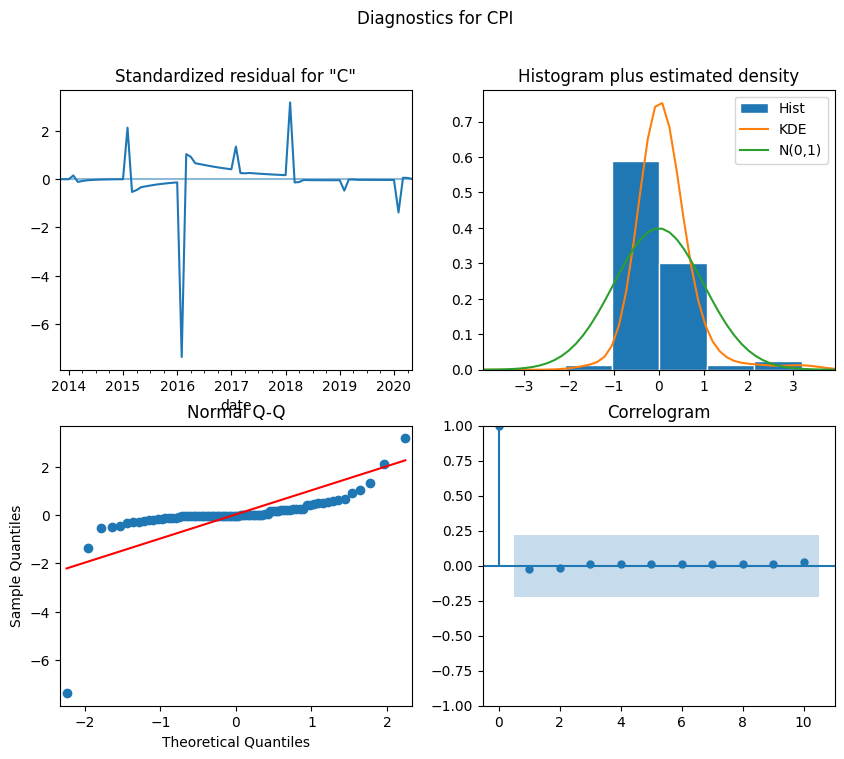

p-value: 1     0.821455
2     0.958273
3     0.992930
4     0.998871
5     0.999823
6     0.999971
7     0.999995
8     0.999999
9     1.000000
10    1.000000
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Exchange Rate...
Best (p, q) for Exchange Rate: (0, 2), d: 2
Diagnostics for Exchange Rate:


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


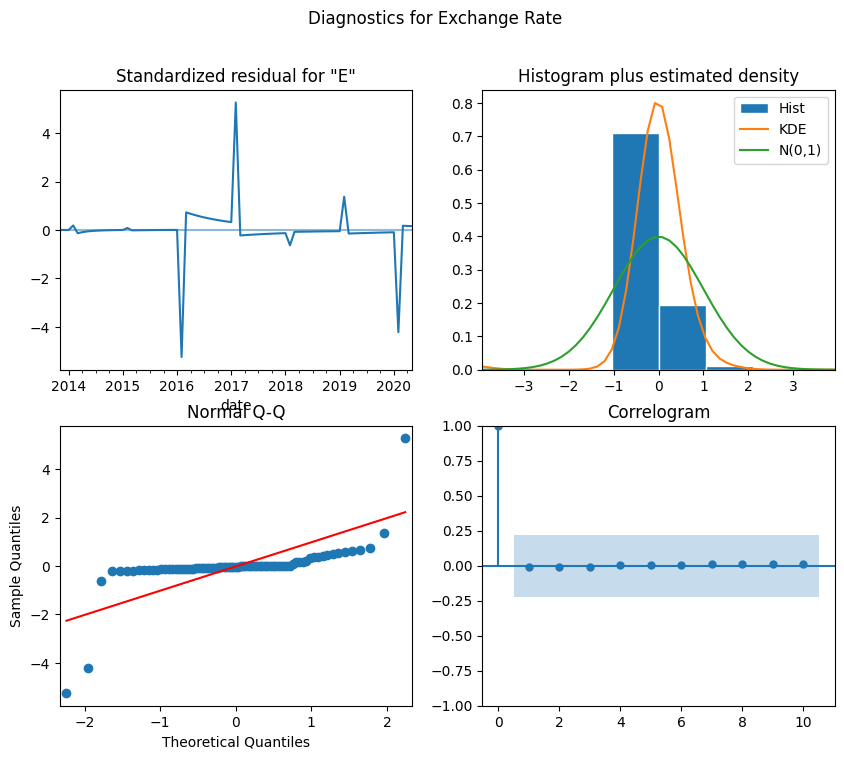

p-value: 1     0.928260
2     0.993230
3     0.999409
4     0.999957
5     0.999996
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    1.000000
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for GDP Deflator...
Best (p, q) for GDP Deflator: (0, 3), d: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostics for GDP Deflator:


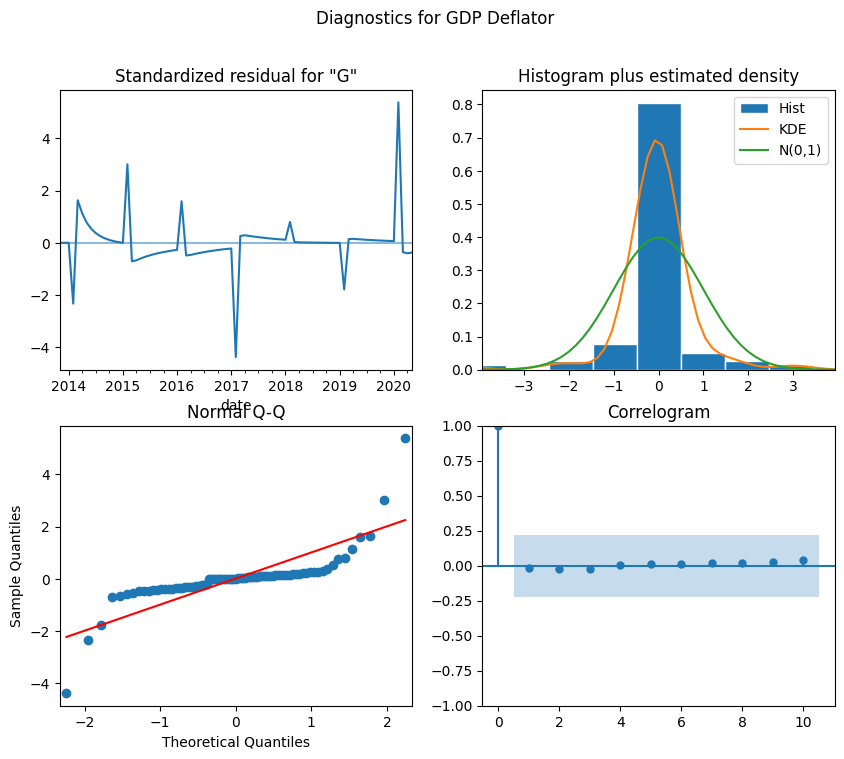

p-value: 1     0.794930
2     0.930888
3     0.979114
4     0.995679
5     0.999140
6     0.999824
7     0.999958
8     0.999987
9     0.999993
10    0.999992
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for GDP Growth...
Best (p, q) for GDP Growth: (2, 0), d: 0
Diagnostics for GDP Growth:


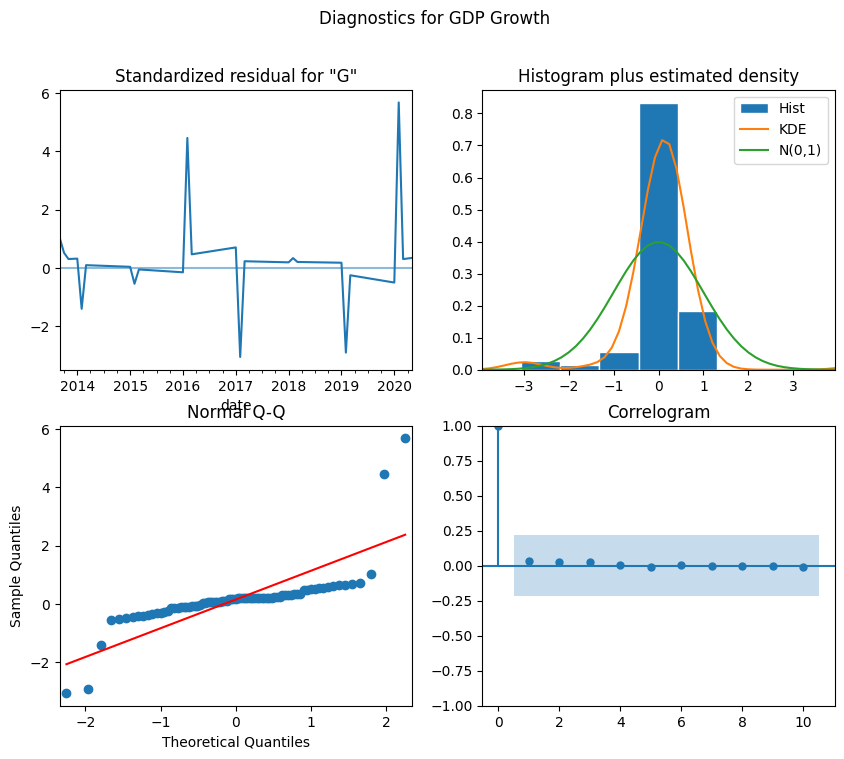

p-value: 1     0.733144
2     0.939916
3     0.987797
4     0.997757
5     0.995161
6     0.998801
7     0.999723
8     0.999939
9     0.999987
10    0.999997
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Cereal Yield...
Best (p, q) for Cereal Yield: (1, 3), d: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Diagnostics for Cereal Yield:


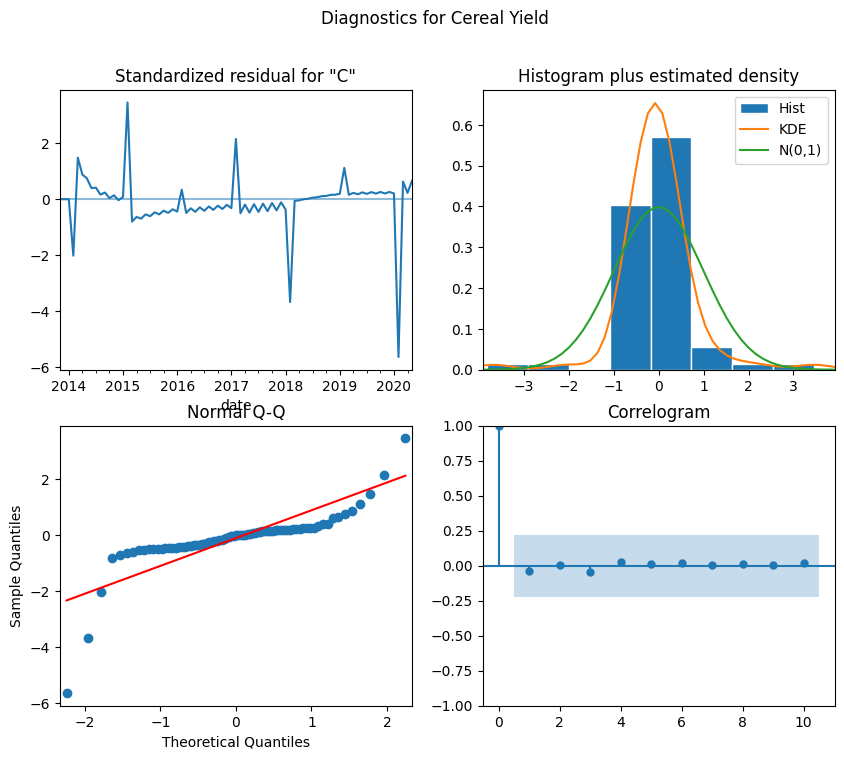

p-value: 1     0.658262
2     0.906764
3     0.946895
4     0.982614
5     0.995259
6     0.998518
7     0.999623
8     0.999894
9     0.999972
10    0.999989
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Fertilizer Consumption...
Best (p, q) for Fertilizer Consumption: (0, 3), d: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Diagnostics for Fertilizer Consumption:


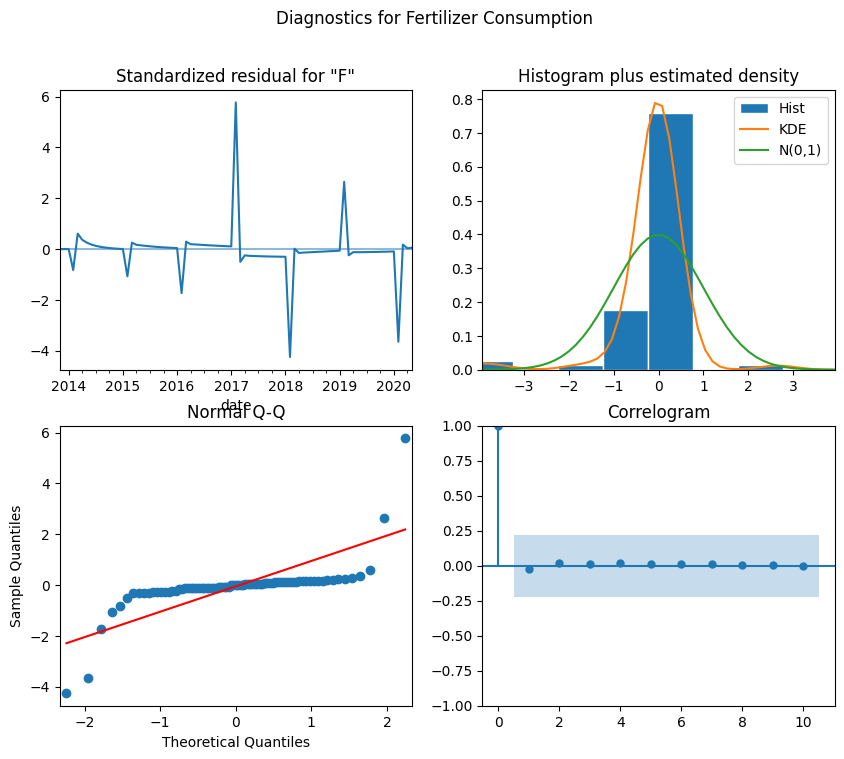

p-value: 1     0.812192
2     0.962058
3     0.993134
4     0.998623
5     0.999743
6     0.999955
7     0.999993
8     0.999999
9     1.000000
10    1.000000
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Rural Population...
Best (p, q) for Rural Population: (4, 0), d: 3
Diagnostics for Rural Population:


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


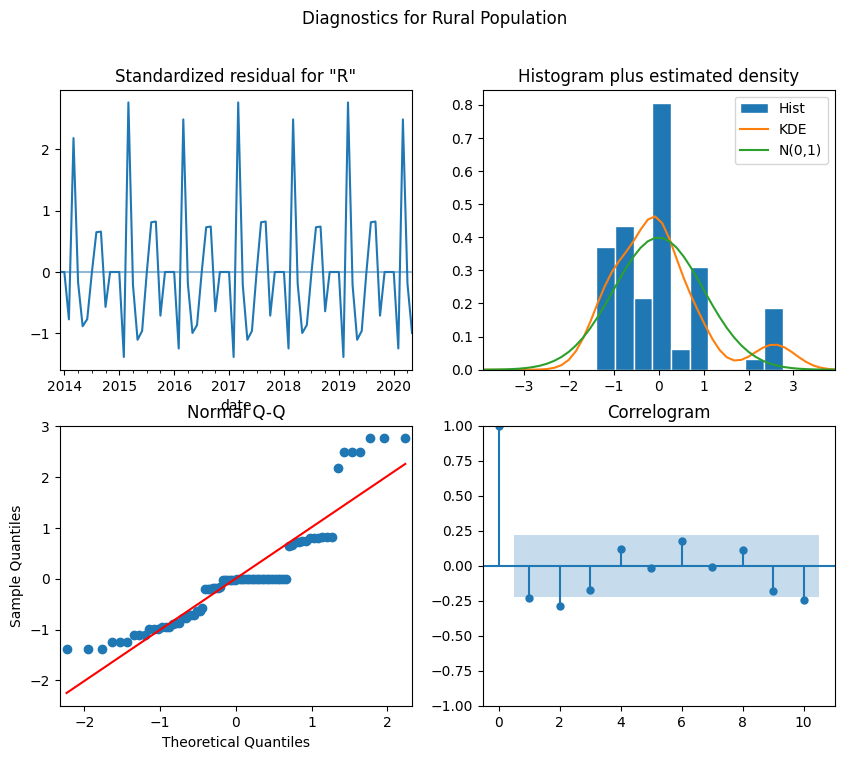

p-value: 1     0.026690
2     0.002907
3     0.002786
4     0.004055
5     0.008967
6     0.006338
7     0.012067
8     0.014165
9     0.009206
10    0.002374
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Employment in Agriculture...
Best (p, q) for Employment in Agriculture: (2, 4), d: 2
Diagnostics for Employment in Agriculture:


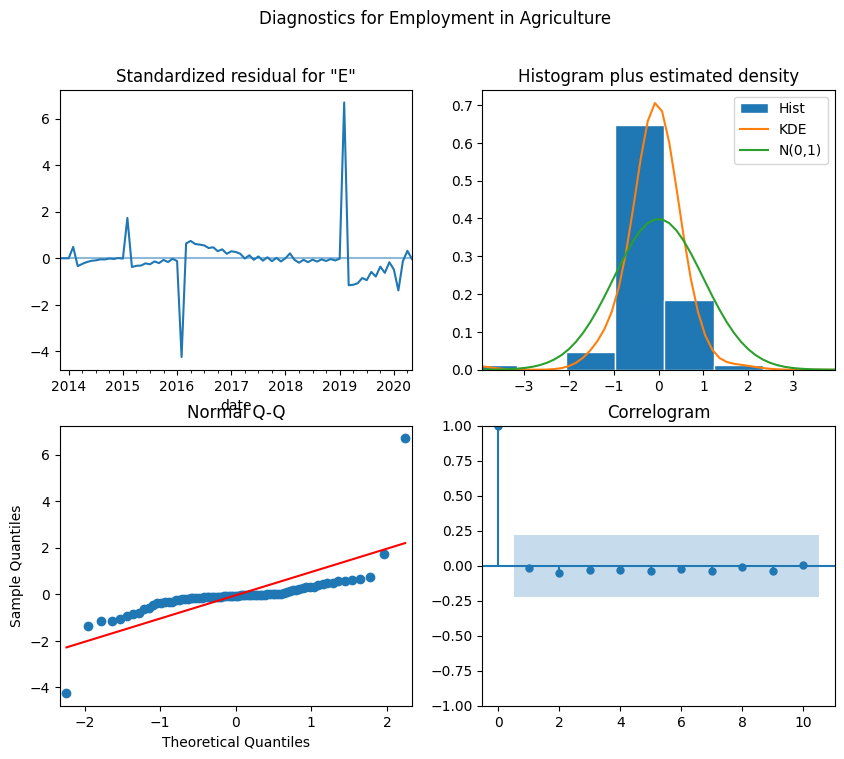

p-value: 1     0.893241
2     0.891632
3     0.955896
4     0.981563
5     0.990355
6     0.996638
7     0.998141
8     0.999441
9     0.999717
10    0.999920
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Access to Electricity...
Best (p, q) for Access to Electricity: (2, 0), d: 0
Diagnostics for Access to Electricity:


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


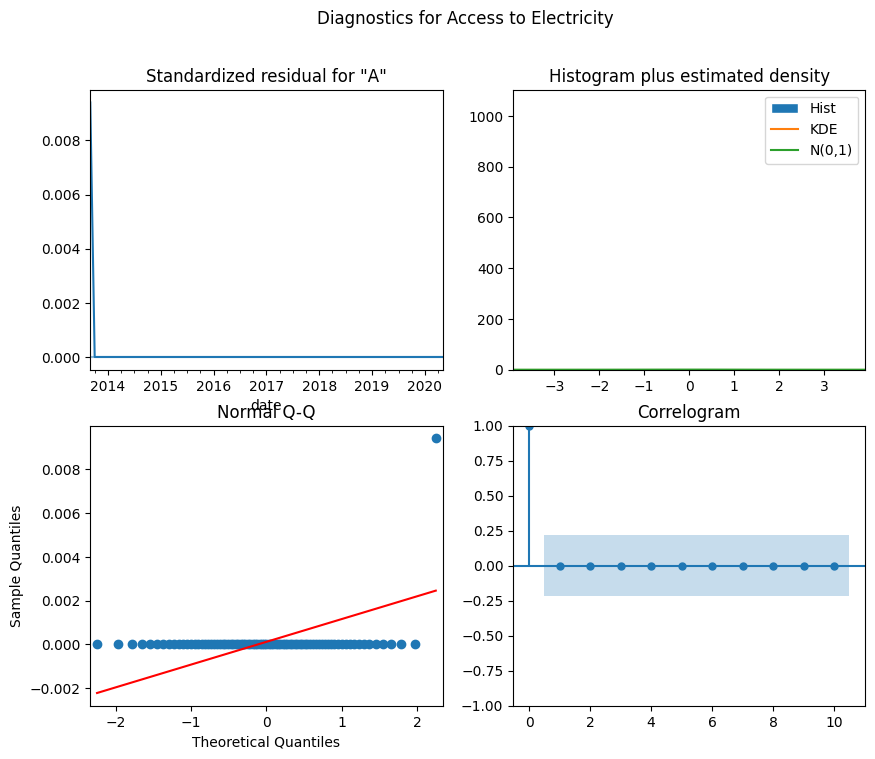

p-value: 1      1.185702e-19
2      2.869519e-36
3      1.390606e-52
4      1.088270e-68
5      1.575510e-84
6     3.652888e-100
7     1.518468e-115
8     1.020802e-130
9     1.201769e-145
10    2.320646e-160
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Inflation Rate...
Best (p, q) for Inflation Rate: (0, 3), d: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Diagnostics for Inflation Rate:


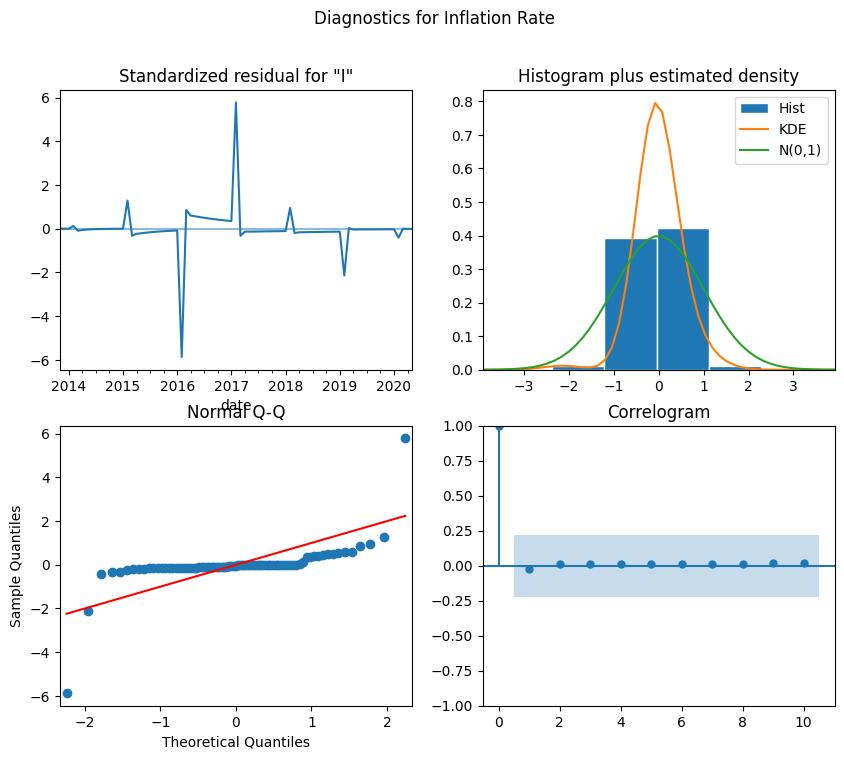

p-value: 1     0.830142
2     0.973563
3     0.996040
4     0.999389
5     0.999900
6     0.999982
7     0.999997
8     0.999999
9     1.000000
10    1.000000
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for temperature_2m_max...
Best (p, q) for temperature_2m_max: (2, 3), d: 1
Diagnostics for temperature_2m_max:


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


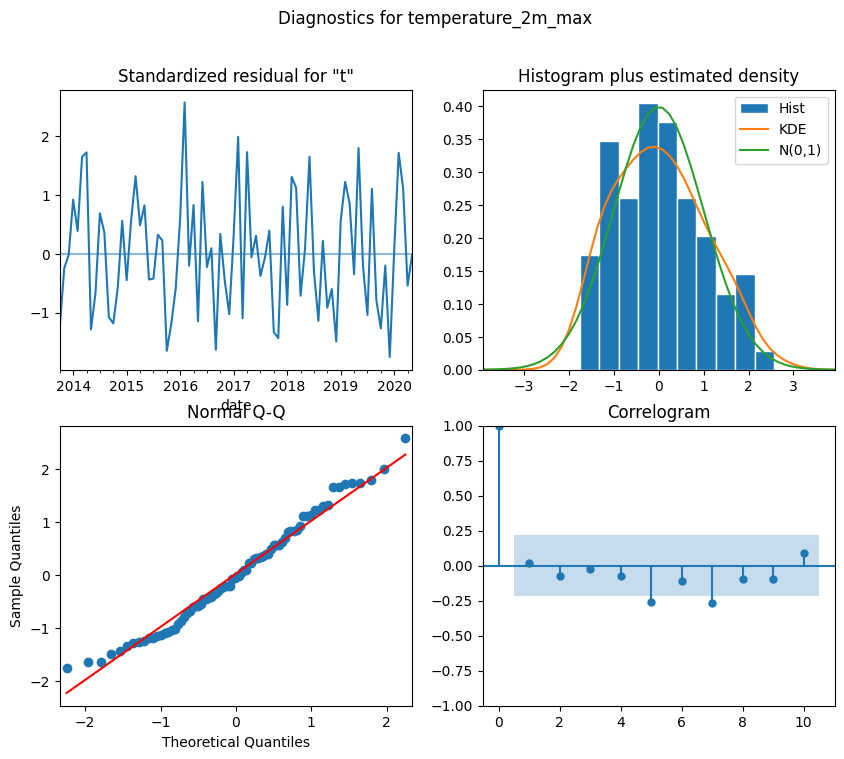

p-value: 1     0.818069
2     0.761731
3     0.896350
4     0.894902
5     0.217198
6     0.219383
7     0.052882
8     0.065737
9     0.075823
10    0.091516
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for temperature_2m_min...
Best (p, q) for temperature_2m_min: (4, 3), d: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostics for temperature_2m_min:


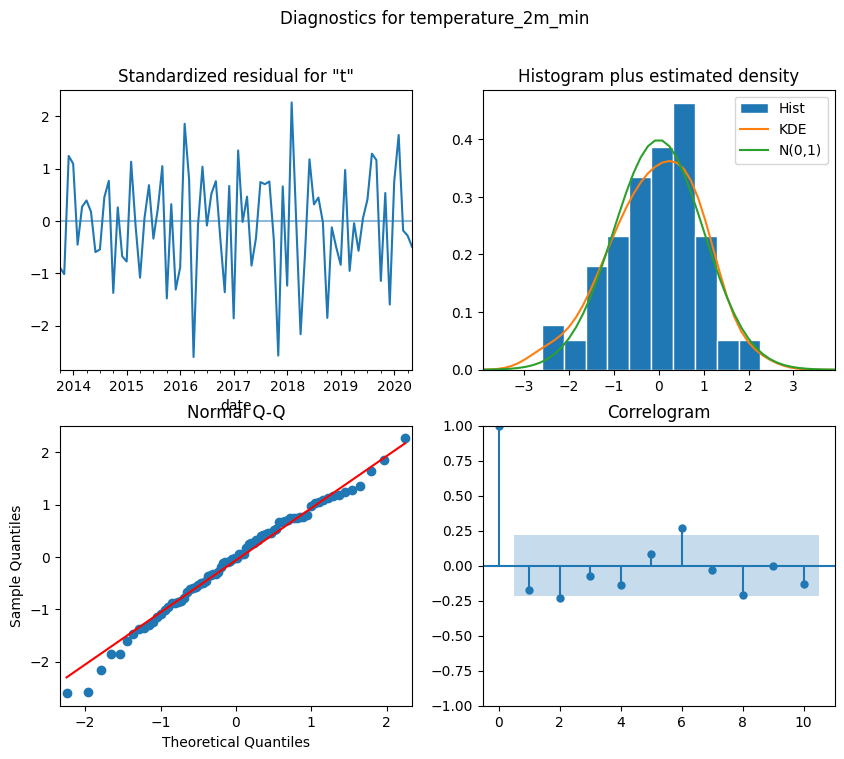

p-value: 1     0.229137
2     0.033033
3     0.062397
4     0.072282
5     0.110957
6     0.043508
7     0.070367
8     0.049775
9     0.077583
10    0.069793
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for temperature_2m_mean...
Best (p, q) for temperature_2m_mean: (3, 1), d: 1
Diagnostics for temperature_2m_mean:


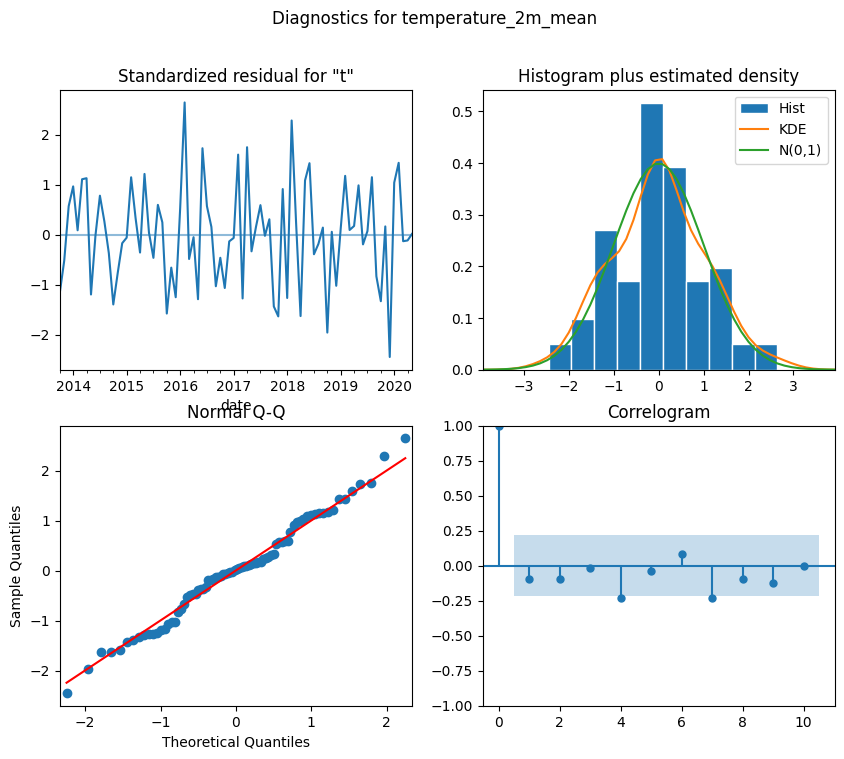

p-value: 1     0.442382
2     0.488345
3     0.690111
4     0.204666
5     0.296630
6     0.358243
7     0.135921
8     0.157788
9     0.146499
10    0.203568
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for precipitation_sum...
Best (p, q) for precipitation_sum: (1, 4), d: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostics for precipitation_sum:


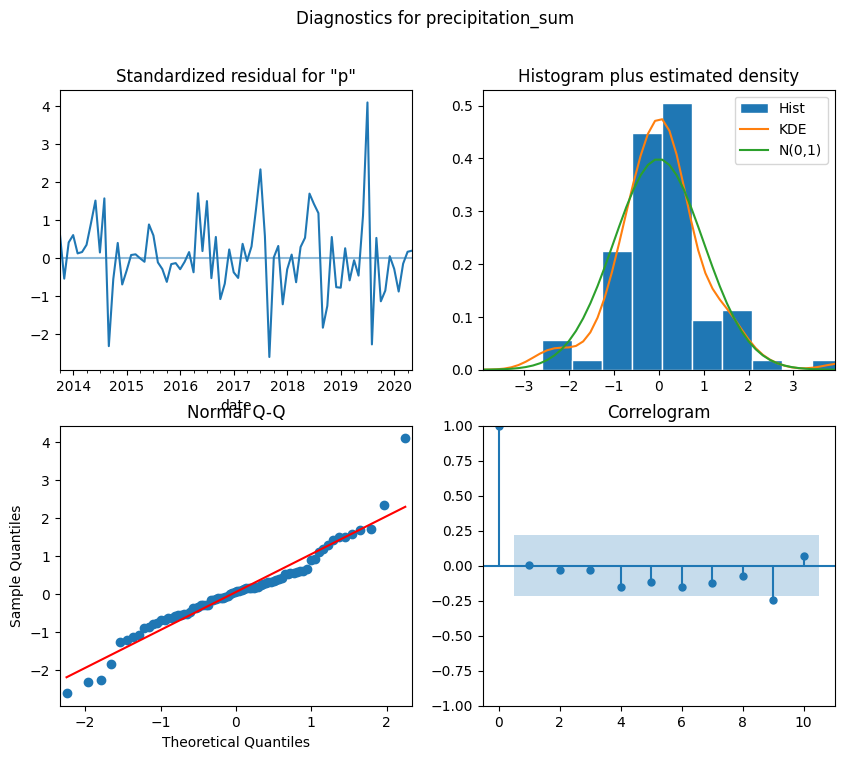

p-value: 1     0.901040
2     0.989138
3     0.993375
4     0.718328
5     0.672168
6     0.530337
7     0.497694
8     0.539593
9     0.133145
10    0.160080
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for wind_speed_10m_max...
Best (p, q) for wind_speed_10m_max: (0, 4), d: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Diagnostics for wind_speed_10m_max:


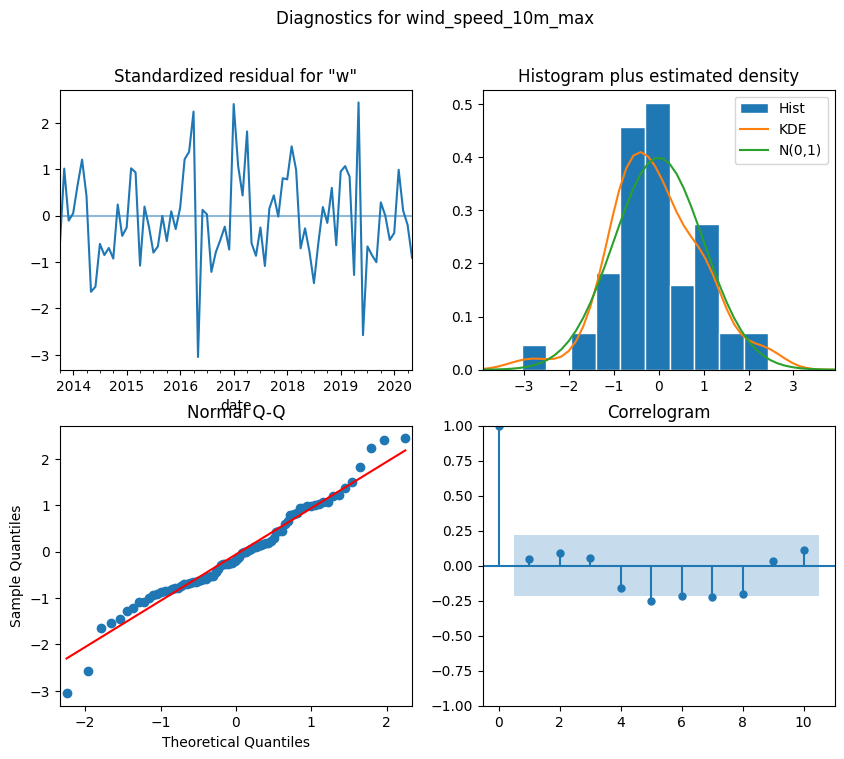

p-value: 1     0.609015
2     0.625134
3     0.761714
4     0.555608
5     0.132953
6     0.043235
7     0.017032
8     0.008574
9     0.014904
10    0.017265
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for shortwave_radiation_sum...
Best (p, q) for shortwave_radiation_sum: (4, 4), d: 1


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostics for shortwave_radiation_sum:


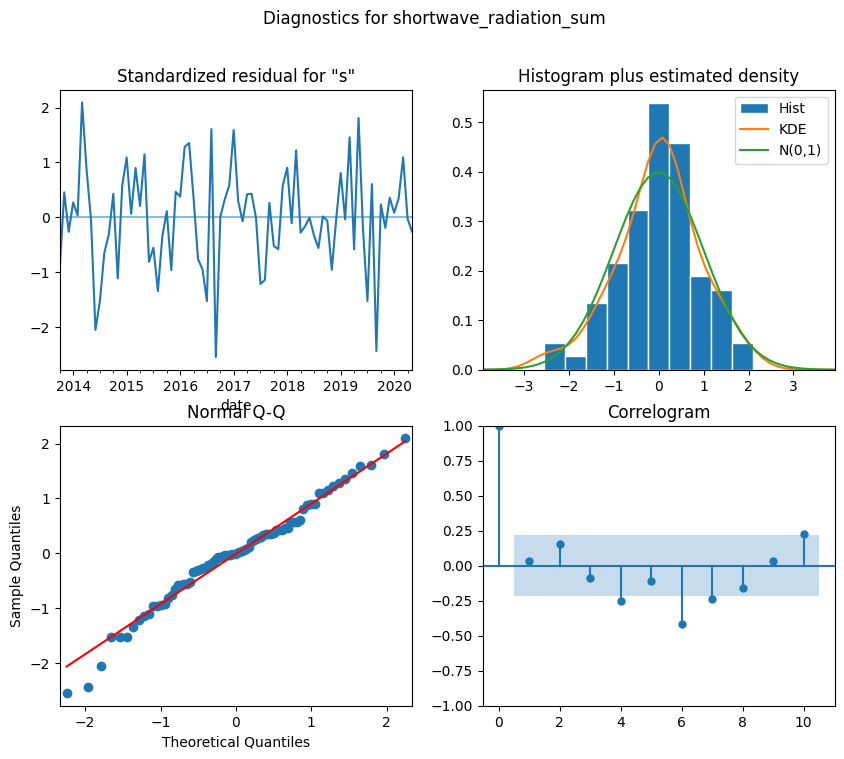

p-value: 1     0.802929
2     0.331837
3     0.348130
4     0.093077
5     0.090943
6     0.000998
7     0.000334
8     0.000347
9     0.000684
10    0.000297
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for et0_fao_evapotranspiration...
Best (p, q) for et0_fao_evapotranspiration: (2, 1), d: 0
Diagnostics for et0_fao_evapotranspiration:


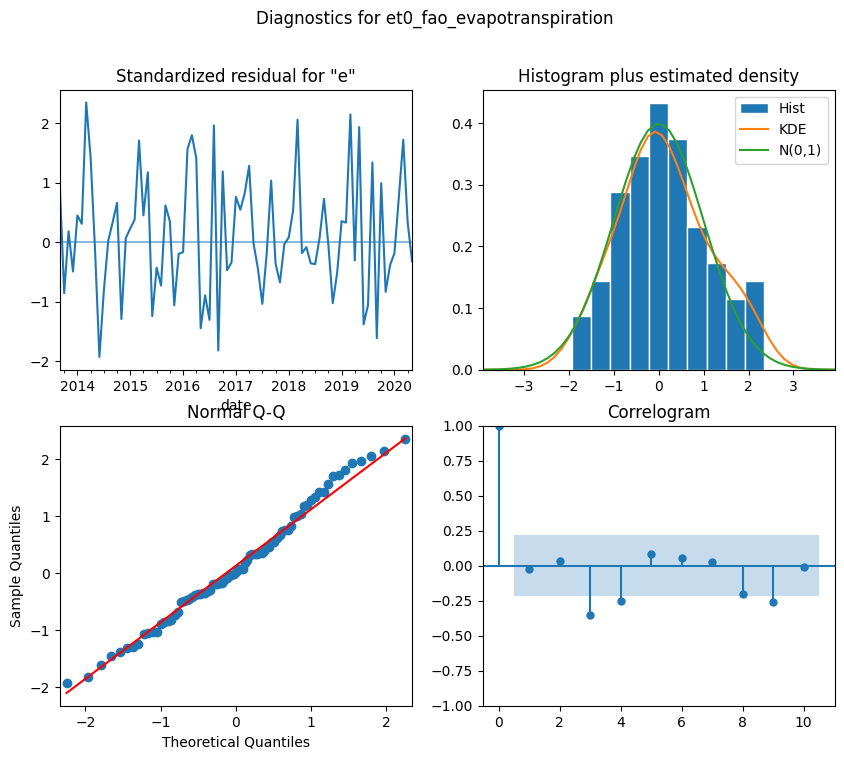

p-value: 1     0.607377
2     0.845388
3     0.042445
4     0.023087
5     0.037724
6     0.039726
7     0.057308
8     0.037889
9     0.004499
10    0.007519
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Export Quantity...
Best (p, q) for Export Quantity: (2, 0), d: 0
Diagnostics for Export Quantity:


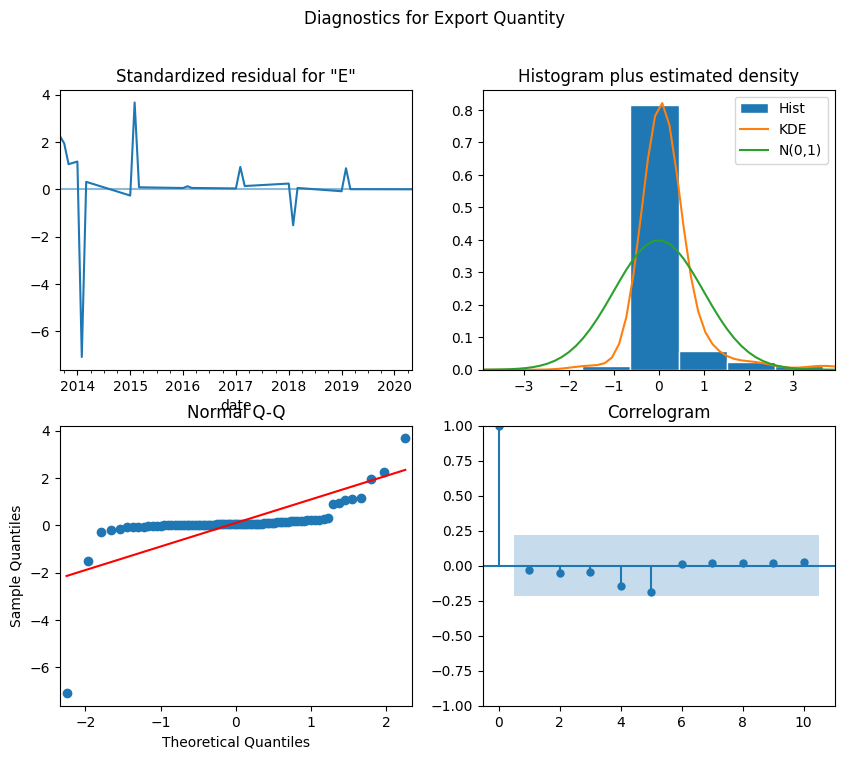

p-value: 1     0.382575
2     0.670819
3     0.839696
4     0.932021
5     0.675458
6     0.788402
7     0.869653
8     0.923788
9     0.957527
10    0.977349
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Import Quantity...
Best (p, q) for Import Quantity: (1, 2), d: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Diagnostics for Import Quantity:


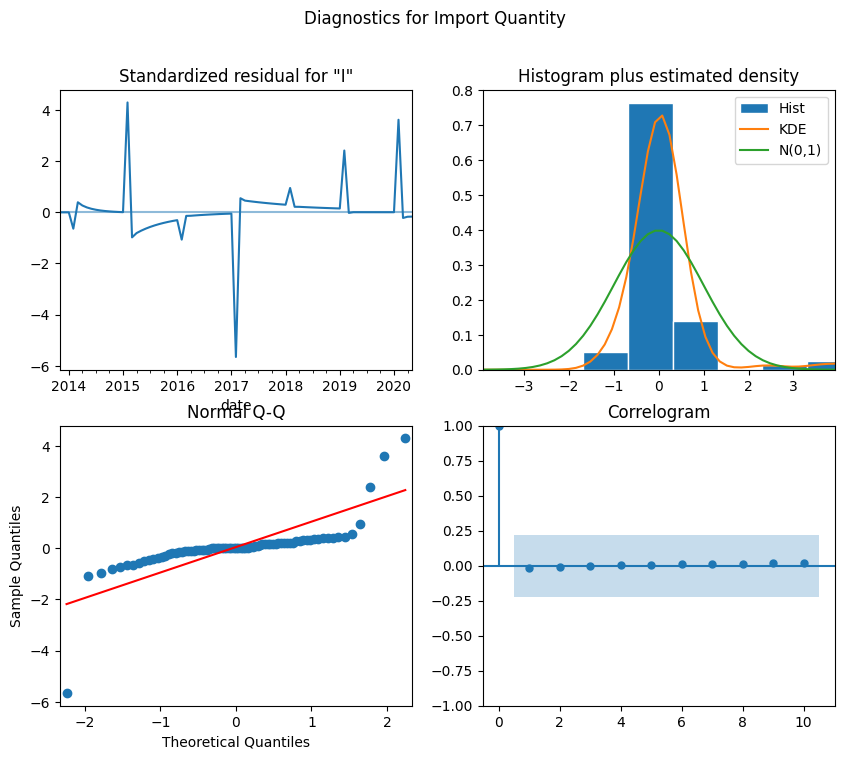

p-value: 1     0.844700
2     0.978529
3     0.997381
4     0.999708
5     0.999966
6     0.999996
7     0.999999
8     1.000000
9     1.000000
10    1.000000
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Area harvested...
Best (p, q) for Area harvested: (2, 0), d: 0
Diagnostics for Area harvested:


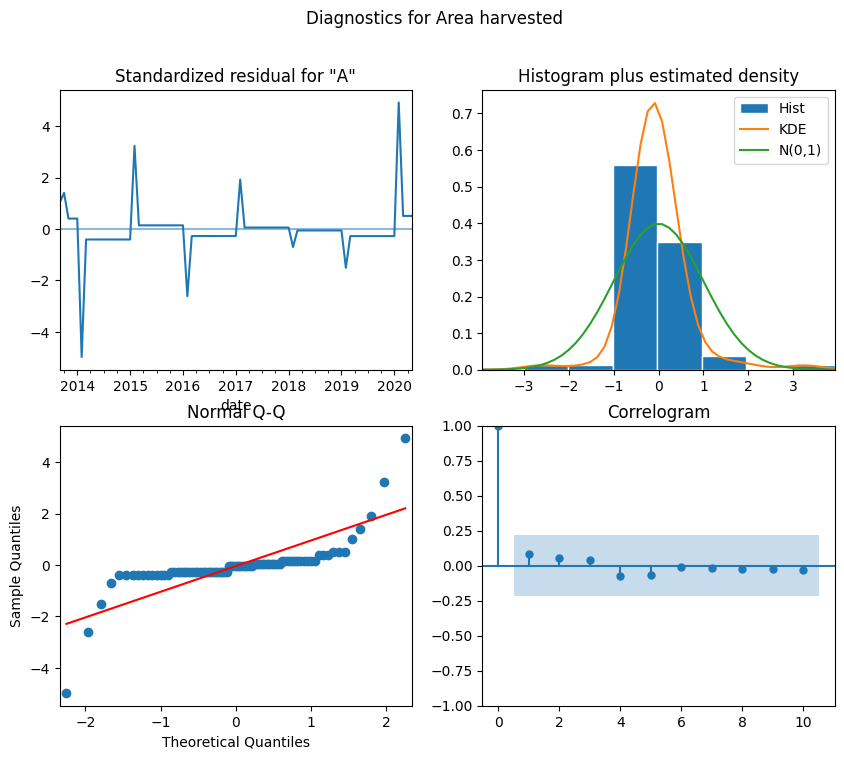

p-value: 1     0.974760
2     0.999494
3     0.999991
4     1.000000
5     1.000000
6     1.000000
7     1.000000
8     1.000000
9     1.000000
10    1.000000
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Production...
Best (p, q) for Production: (0, 3), d: 2


c:\Users\lukas\Documents\Uni\PAII\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Diagnostics for Production:


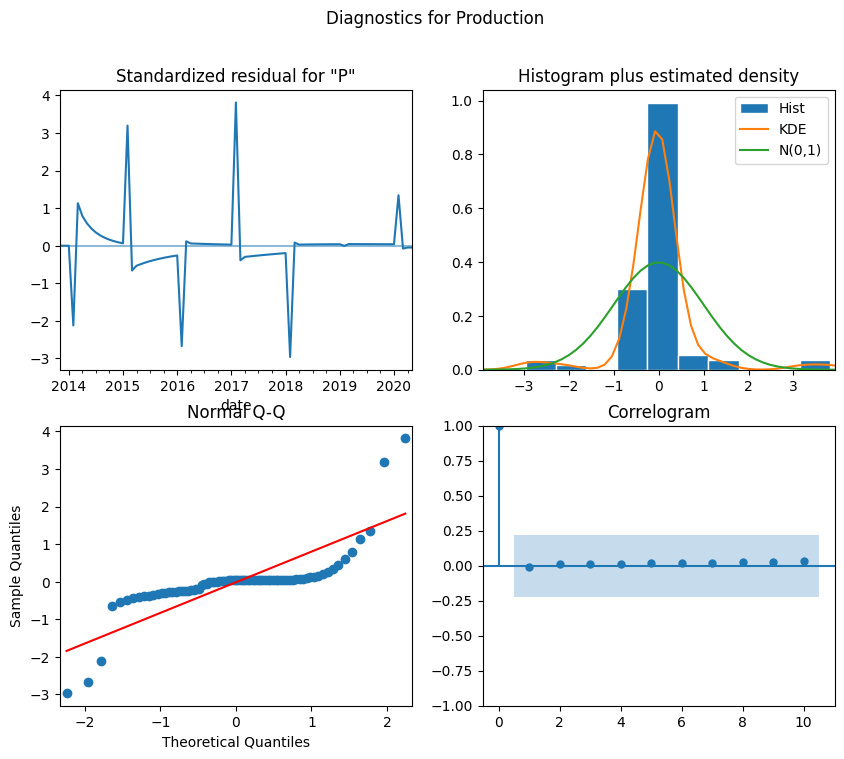

p-value: 1     0.849062
2     0.981460
3     0.997747
4     0.999664
5     0.999936
6     0.999983
7     0.999994
8     0.999997
9     0.999998
10    0.999998
Name: lb_pvalue, dtype: float64
Fitting SARIMAX for Yield...
Best (p, q) for Yield: (0, 2), d: 2
Diagnostics for Yield:


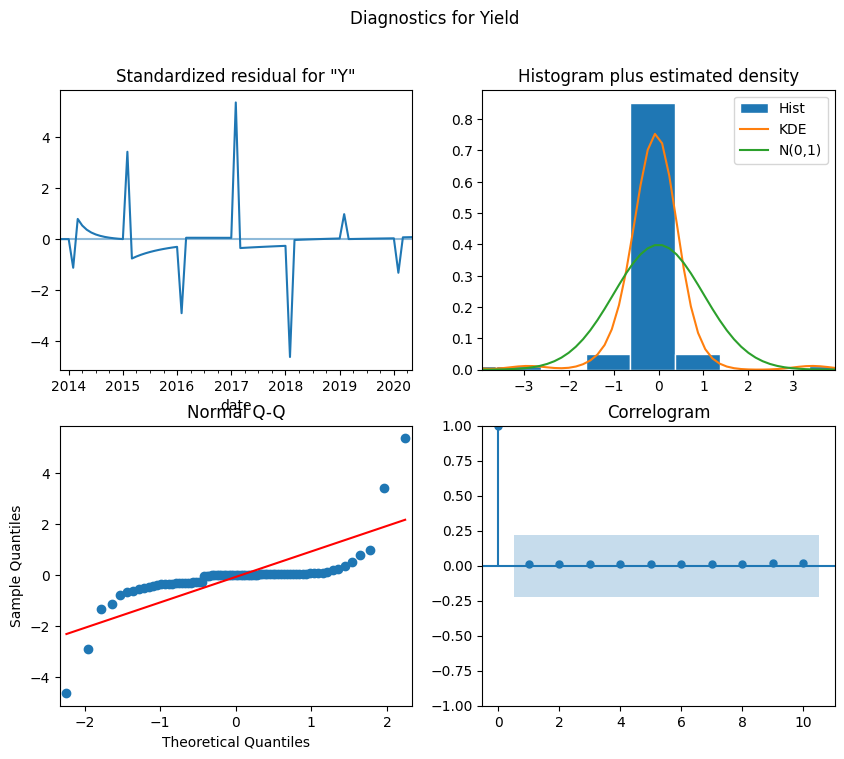

p-value: 1     0.965029
2     0.996852
3     0.999634
4     0.999928
5     0.999986
6     0.999996
7     0.999999
8     1.000000
9     1.000000
10    1.000000
Name: lb_pvalue, dtype: float64


In [82]:
from statsmodels.stats.diagnostic import acorr_ljungbox

def fit_and_diagnose_sarimax_with_results(df, df_results, differencing_degrees):

    fitted_models = {}
    
    for col in df.columns:
        print(f"Fitting SARIMAX for {col}...")
        
        best_pq = df_results[col]['(p,q)'].iloc[0]  # First (p, q) from the sorted results
        p, q = best_pq
        d = differencing_degrees.get(col, 0)  # Get differencing degree
        
        print(f"Best (p, q) for {col}: {best_pq}, d: {d}")
        try:
            # Fit SARIMAX model
            model = SARIMAX(df[col], order=(p, d, q), simple_differencing=False)
            model_fit = model.fit(disp=False)
            fitted_models[col] = model_fit
            
            # Plot diagnostics
            print(f"Diagnostics for {col}:")
            model_fit.plot_diagnostics(figsize=(10, 8))
            plt.suptitle(f"Diagnostics for {col}")
            plt.show()
        
            residuals = model_fit.resid
            lb_test = acorr_ljungbox(residuals, np.arange(1, 11, 1))
            
            print(f"p-value: {lb_test['lb_pvalue']}")
            

        except Exception as e:
            print(f"Error fitting SARIMAX for {col}: {e}")
            fitted_models[col] = None
    
    return fitted_models


fitted_models = fit_and_diagnose_sarimax_with_results(train_data, df_results, differencing_degrees)

---

In [83]:
print(differencing_degrees)

{'CPI': 2, 'Exchange Rate': 2, 'GDP Deflator': 2, 'GDP Growth': 0, 'Cereal Yield': 2, 'Fertilizer Consumption': 2, 'Rural Population': 3, 'Employment in Agriculture': 2, 'Access to Electricity': 0, 'Inflation Rate': 2, 'temperature_2m_max': 1, 'temperature_2m_min': 1, 'temperature_2m_mean': 1, 'precipitation_sum': 1, 'wind_speed_10m_max': 1, 'shortwave_radiation_sum': 1, 'et0_fao_evapotranspiration': 0, 'Export Quantity': 0, 'Import Quantity': 2, 'Area harvested': 0, 'Production': 2, 'Yield': 2}


In [84]:
# Create a DataFrame to store predictions
predictions = pd.DataFrame(index=test_data.index, columns=test_data.columns)

for col in test_data.columns:
    print(f"Predicting for {col}...")
    
    if col in fitted_models and fitted_models[col] is not None:
        try:
            # Get the fitted model
            model_fit = fitted_models[col]
            # Forecast the next steps (length of test data)
            forecast = model_fit.get_forecast(steps=len(test_data)).predicted_mean
            # Revert differencing to the original scale
            d = differencing_degrees.get(col, 0)  # Get differencing degree
            print(col)
            print(d)
            
            
            if d > 0:
                print("Worked")
                # Revert differencing step-by-step
                undifferenced_forecast = forecast.copy()
                for i in range(1, d + 1):
                    last_original_values = features[col].iloc[-i:]  # Get the last original values before differencing
                    undifferenced_forecast = undifferenced_forecast.cumsum() + last_original_values.iloc[-1]

                predictions[col] = undifferenced_forecast
            else:                # No differencing applied, use forecast as is
                predictions[col] = forecast

        except Exception as e:
            print(f"Error predicting for {col}: {e}")
            predictions[col] = np.nan
    else:
        print(f"No fitted model for {col}. Skipping...")

# Evaluate predictions (optional, depending on your requirements)
evaluation = {}
for col in test_data.columns:
    if col in predictions.columns:
        # Calculate Mean Absolute Error (MAE)
        mae = np.mean(np.abs(test_data[col] - predictions[col]))
        evaluation[col] = {'MAE': mae}
        print(f"MAE for {col}: {mae}")

# Display predictions and evaluation results
print("Predictions:")
print(predictions)
print("Evaluation:")
print(evaluation)

Predicting for CPI...
CPI
2
Worked
Predicting for Exchange Rate...
Exchange Rate
2
Worked
Predicting for GDP Deflator...
GDP Deflator
2
Worked
Predicting for GDP Growth...
GDP Growth
0
Predicting for Cereal Yield...
Cereal Yield
2
Worked
Predicting for Fertilizer Consumption...
Fertilizer Consumption
2
Worked
Predicting for Rural Population...
Rural Population
3
Worked
Predicting for Employment in Agriculture...
Employment in Agriculture
2
Worked
Predicting for Access to Electricity...
Access to Electricity
0
Predicting for Inflation Rate...
Inflation Rate
2
Worked
Predicting for temperature_2m_max...
temperature_2m_max
1
Worked
Predicting for temperature_2m_min...
temperature_2m_min
1
Worked
Predicting for temperature_2m_mean...
temperature_2m_mean
1
Worked
Predicting for precipitation_sum...
precipitation_sum
1
Worked
Predicting for wind_speed_10m_max...
wind_speed_10m_max
1
Worked
Predicting for shortwave_radiation_sum...
shortwave_radiation_sum
1
Worked
Predicting for et0_fao_evapo

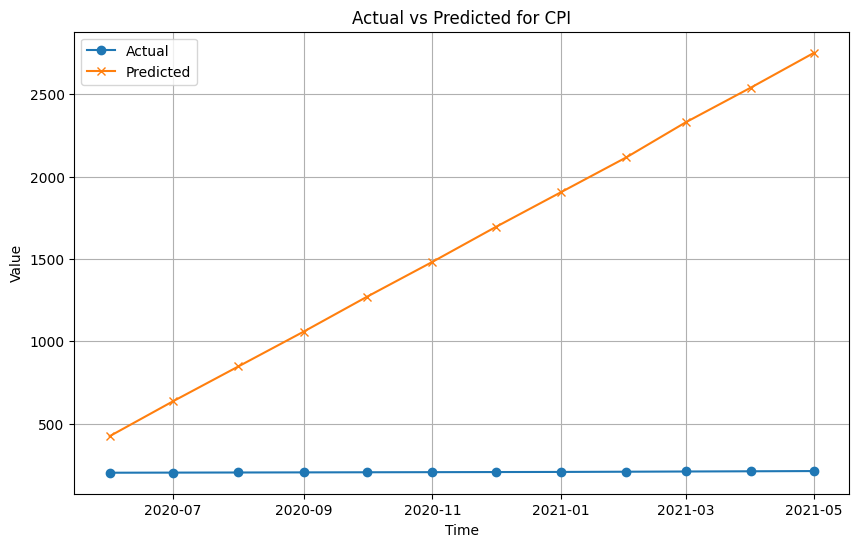

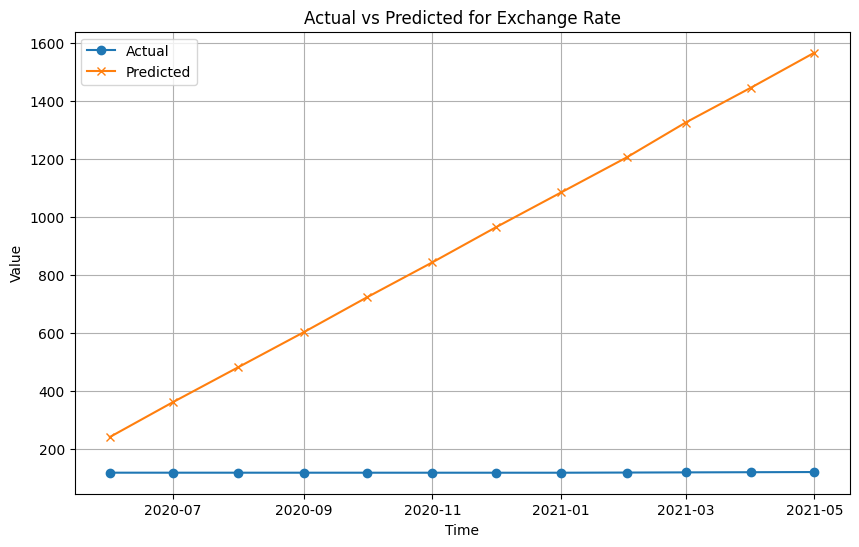

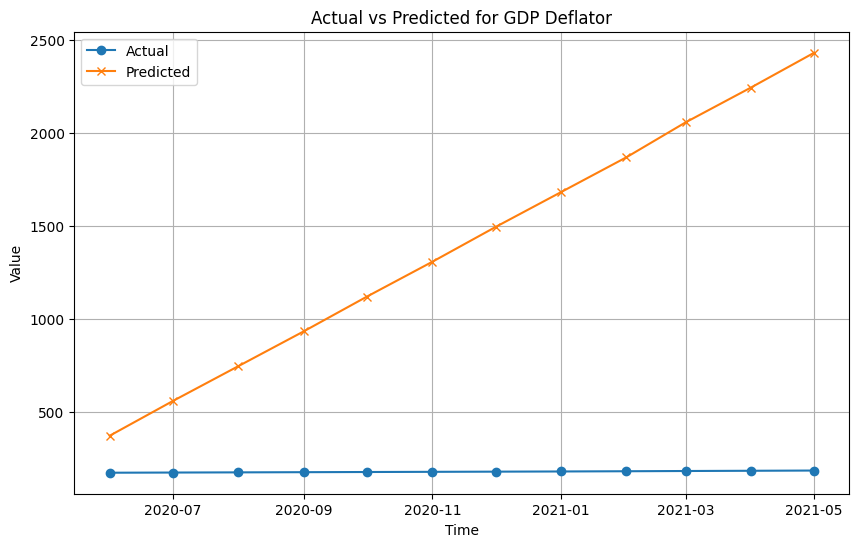

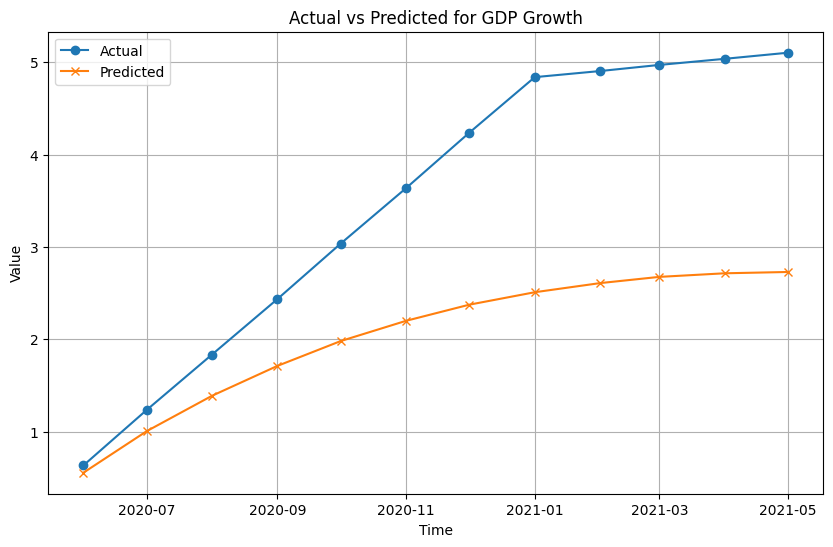

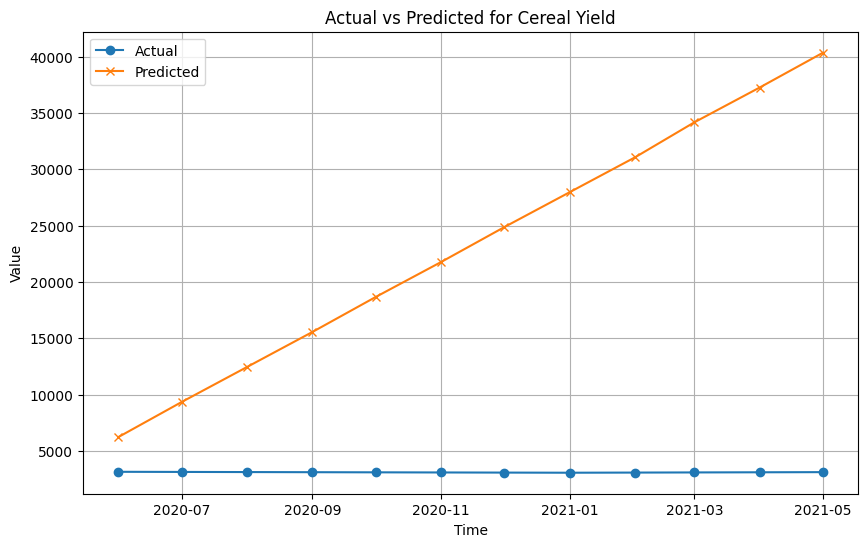

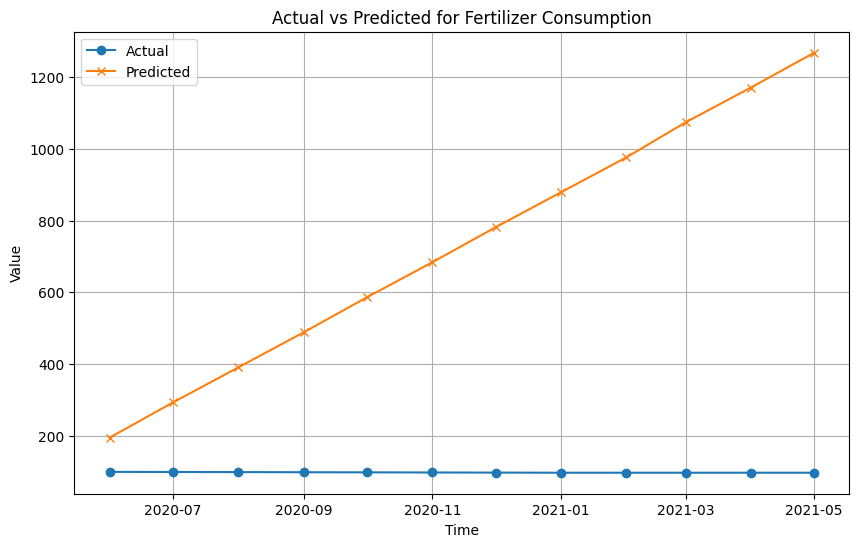

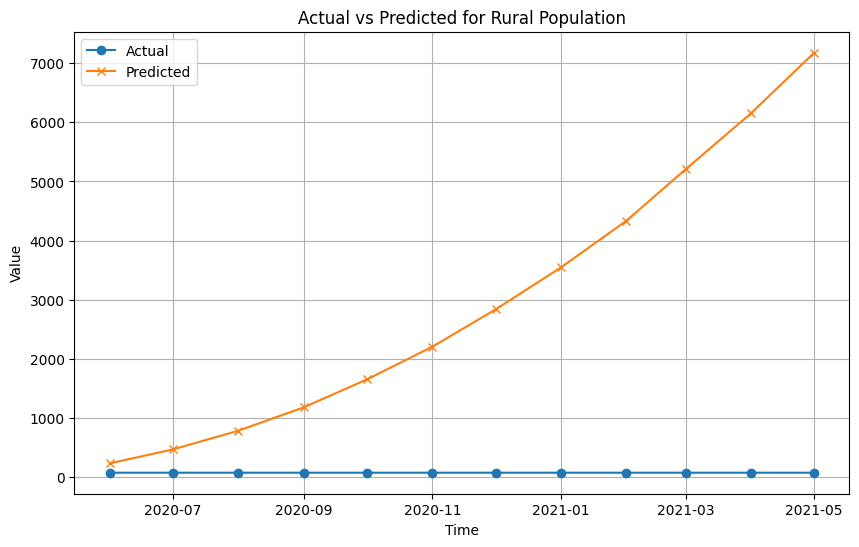

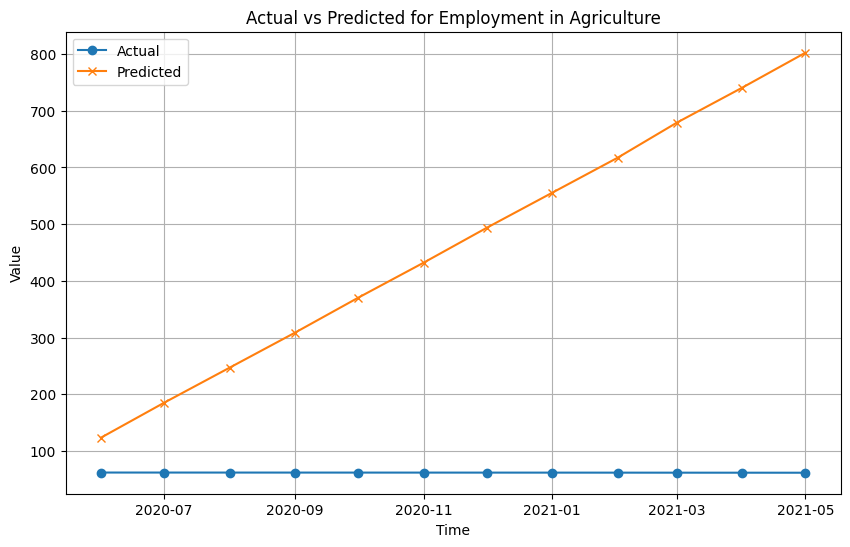

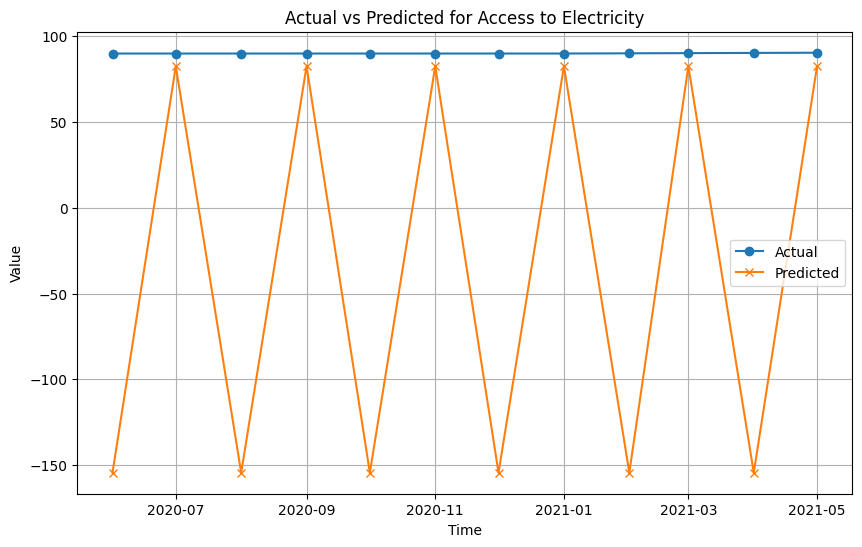

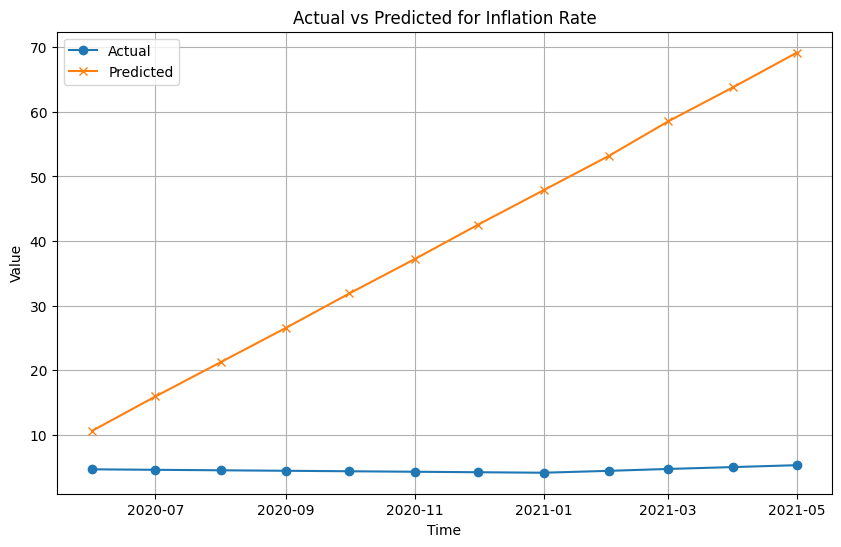

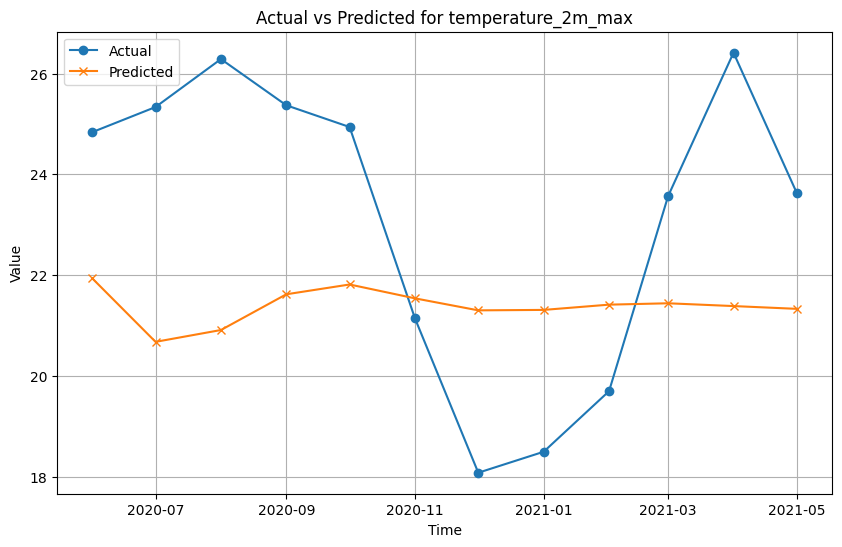

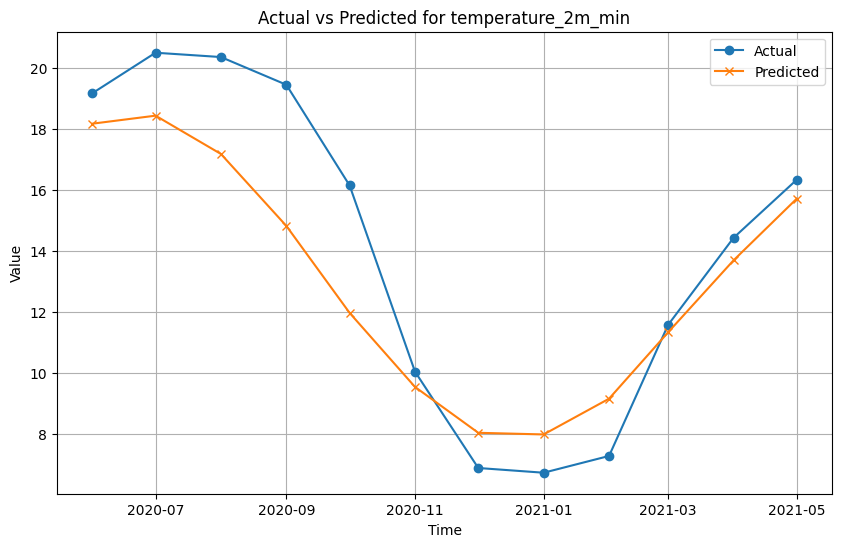

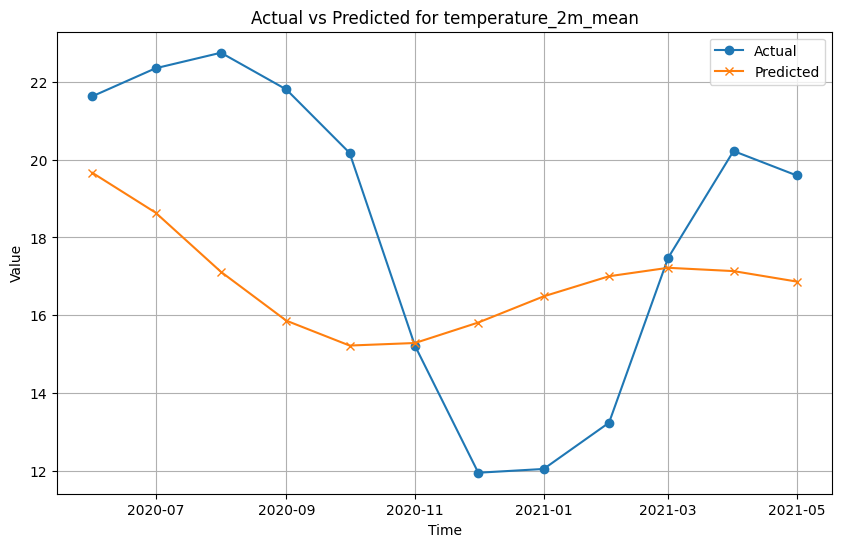

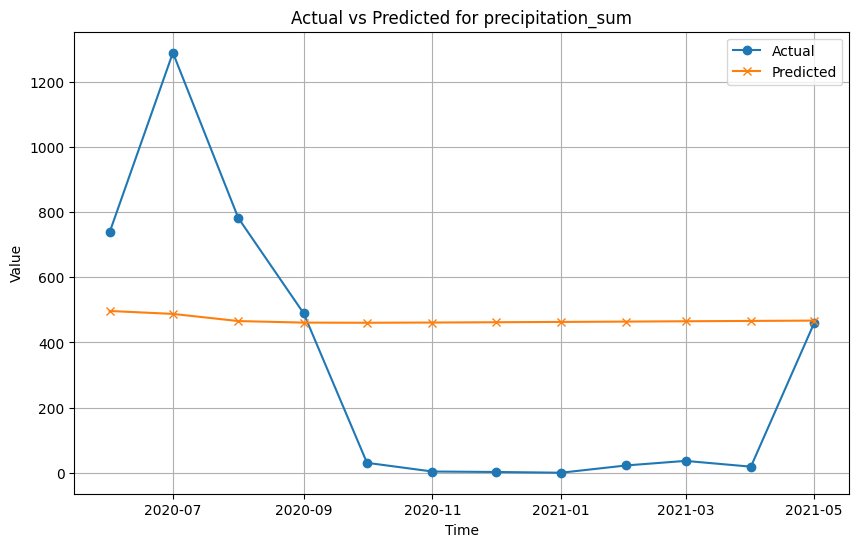

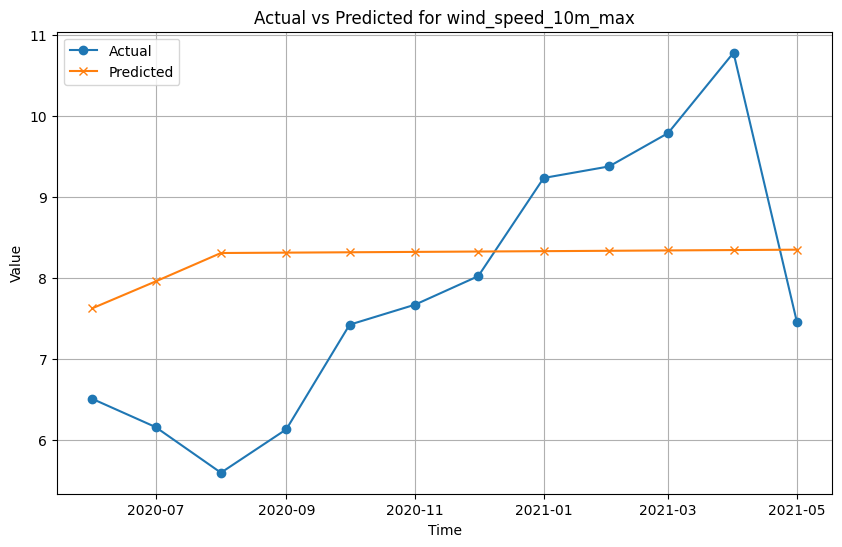

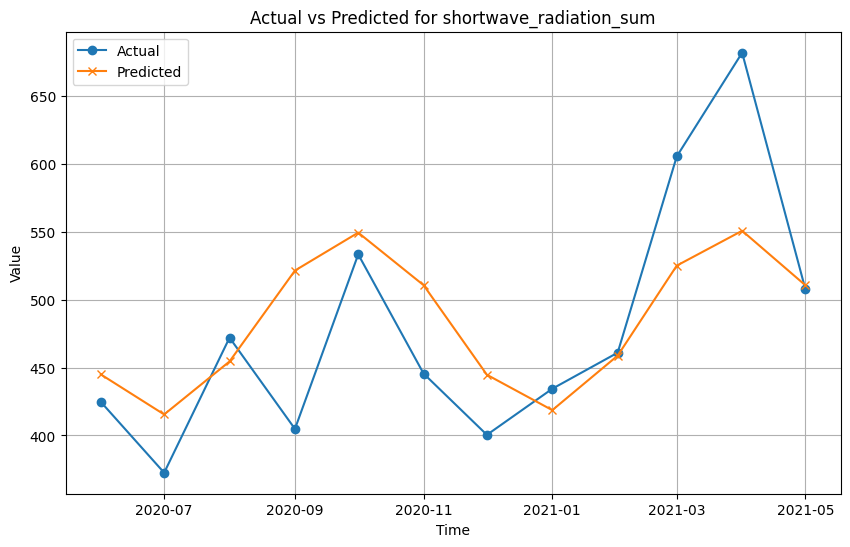

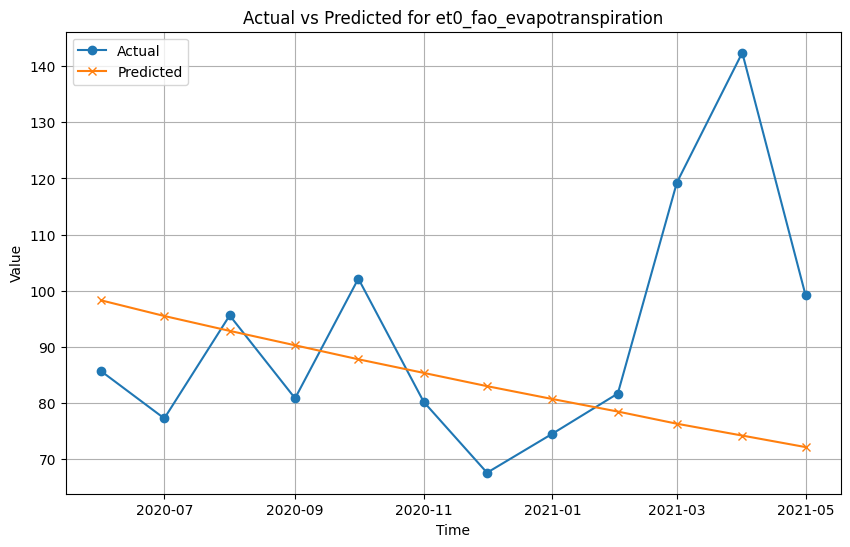

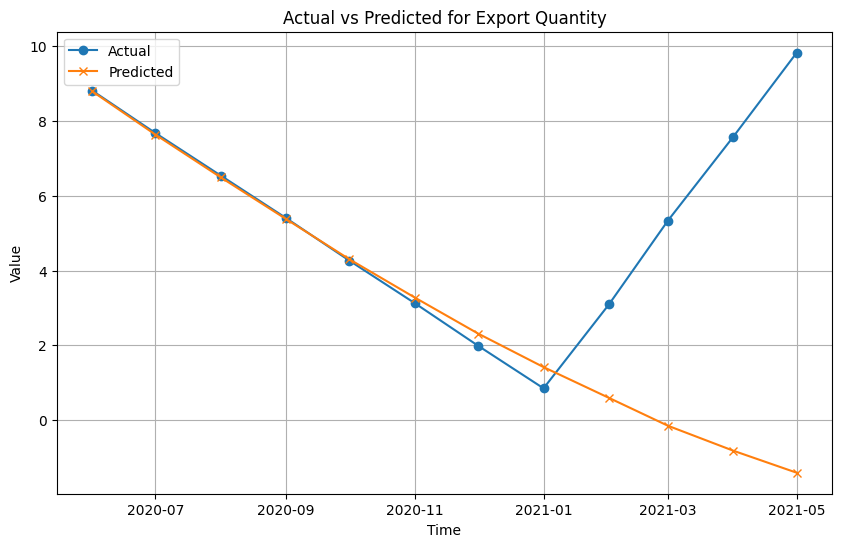

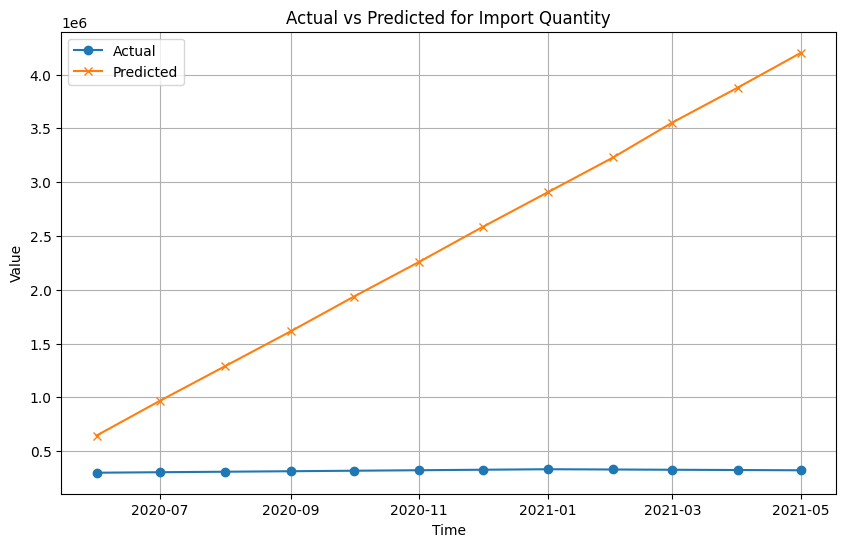

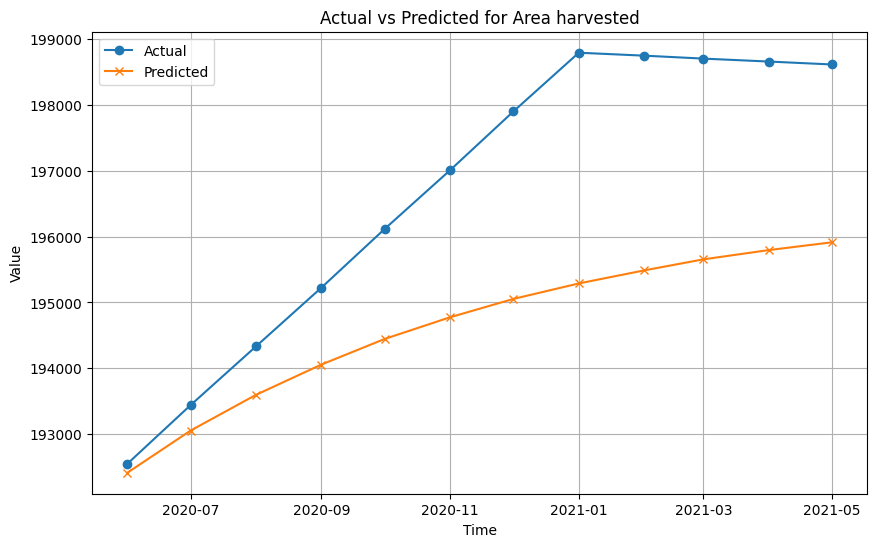

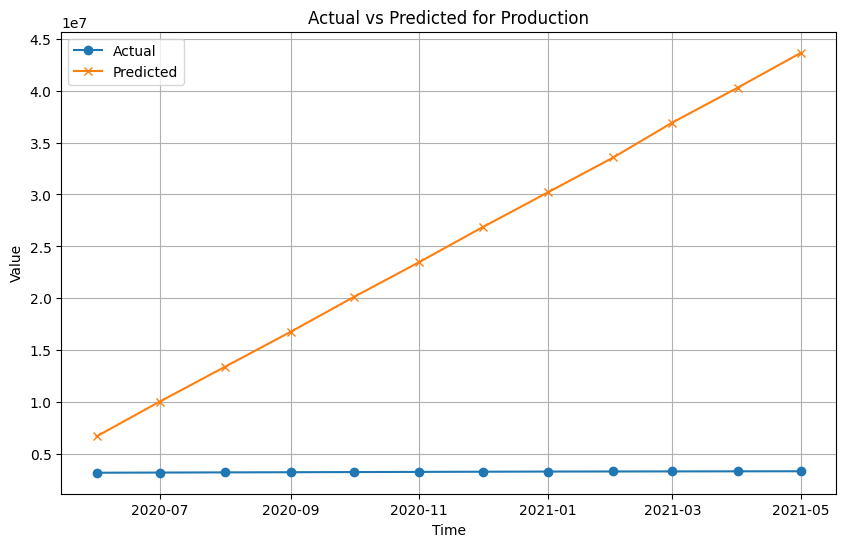

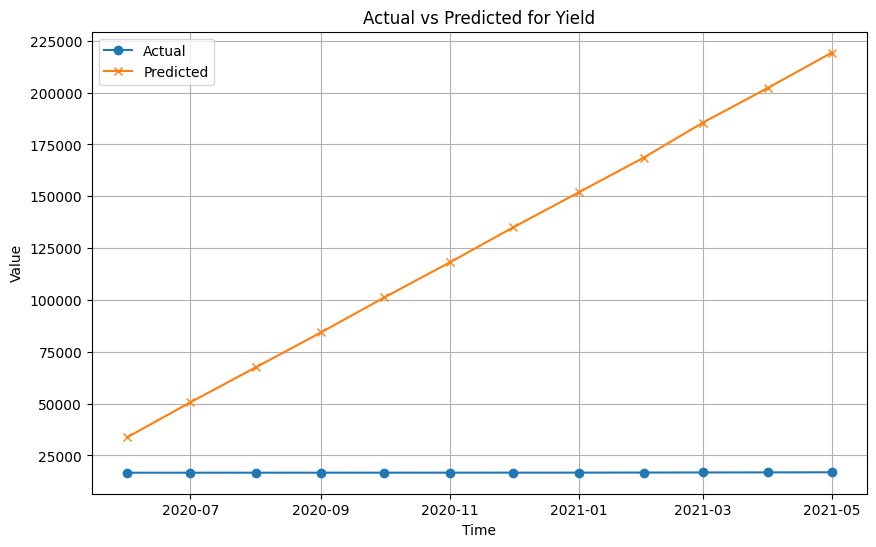

In [85]:
# Plot predicted vs test
def plot_predicted_vs_test(predictions, test_data):
    for col in test_data.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(test_data.index, test_data[col], label="Actual", marker='o')
        plt.plot(predictions.index, predictions[col], label="Predicted", marker='x')
        plt.title(f"Actual vs Predicted for {col}")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend()
        plt.grid()
        plt.show()

plot_predicted_vs_test(predictions, test_data)
